# <h1><center>**Detection of Chronic Kidney Disease Using Machine Learning Models**</center></h1>




#Import the libraries

In [1]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 57.4 MB/s eta 0:00:00


In [3]:

import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve

In [4]:
#to import f1_macro
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Load the data

In [77]:
# Load the data set
df = pd.read_csv("kidney_disease.csv" )


#Data Inspection: Exploratory Analysis and Preprocessing

In [78]:
# Examine the date shape
df.shape

(400, 26)

In [79]:
# Inspect first few rows
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


ValueError: ignored

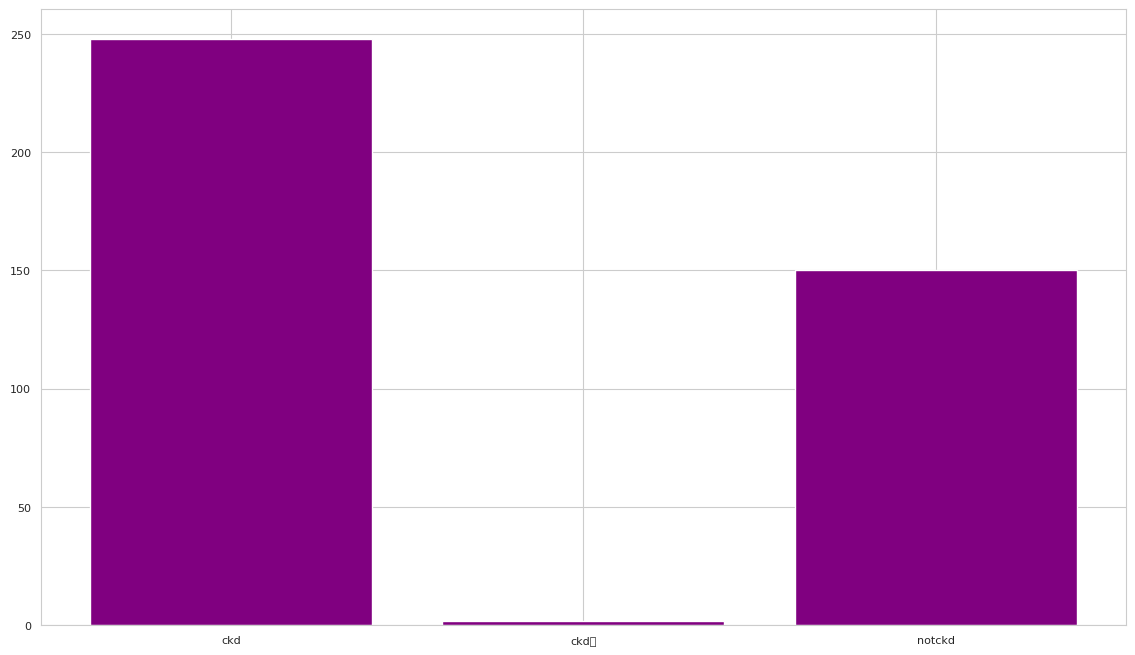

In [81]:
#Distribution of the target

sns.set_style("whitegrid")
classes, counts = np.unique(df['classification'], return_counts=True)
plt.figure(figsize = (14,8))
plt.bar(classes, counts, 
        tick_label=['patients_without_CKD ','patients_with_CKD' ],color= 'purple')
# Write text above every bar
for i, count in enumerate(counts):
    plt.annotate(str(count), xy=(i, count), xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", ha='center', va='bottom', fontsize=18,color= 'purple', fontweight= 'semibold')

plt.xticks(fontsize=18)
plt.suptitle('Patients classification ', fontsize=30, weight ='bold');

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

##Understand the data
Compute descriptive stats

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.1


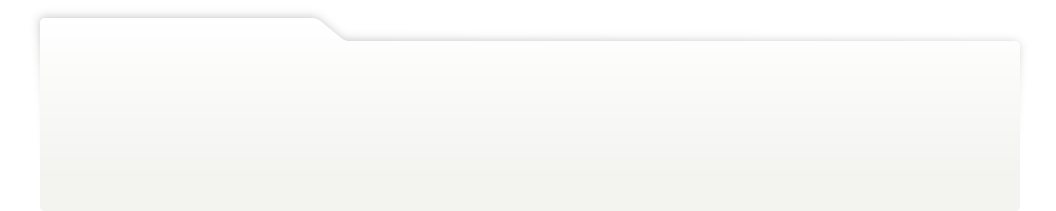
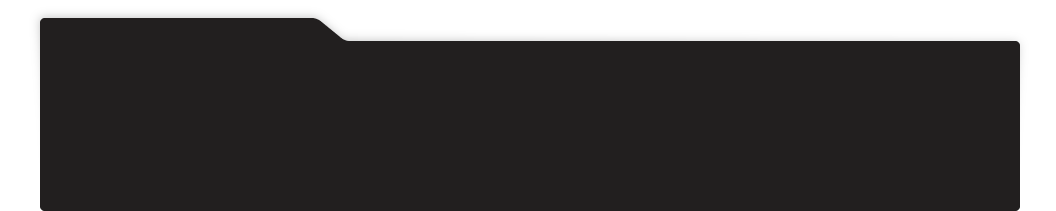
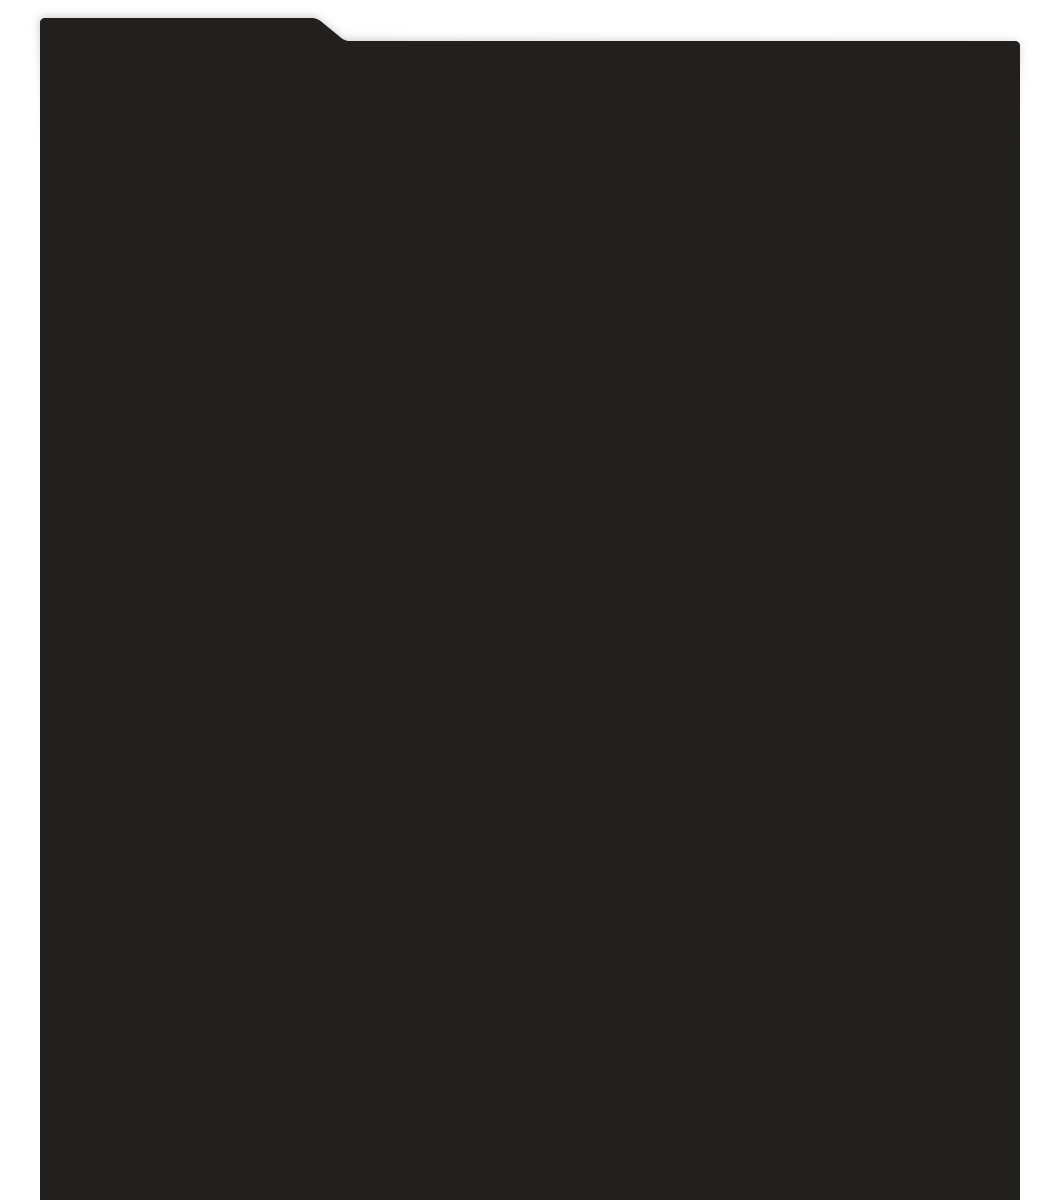
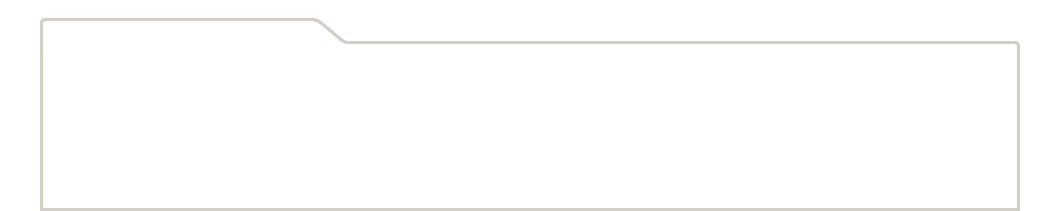
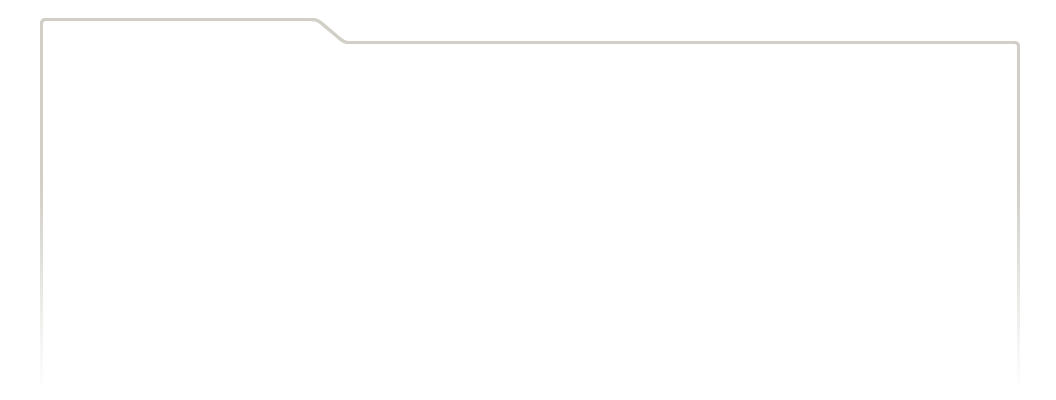
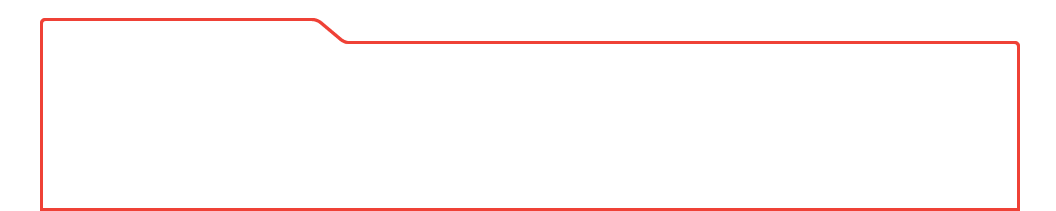
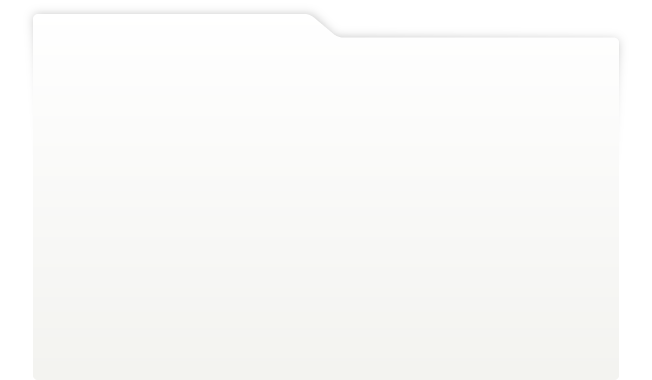
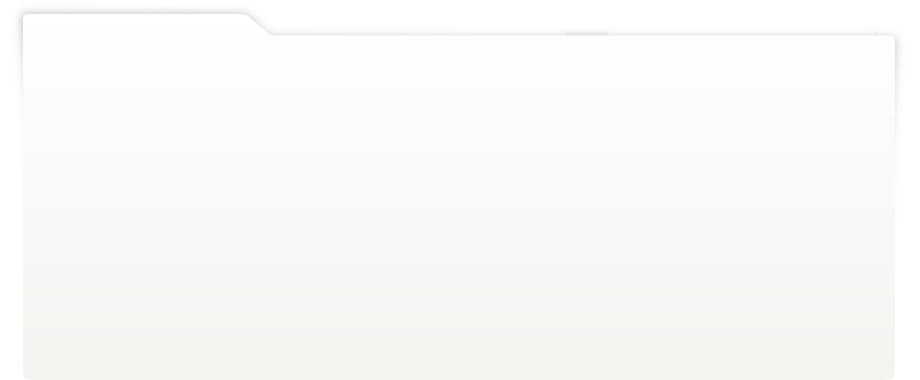
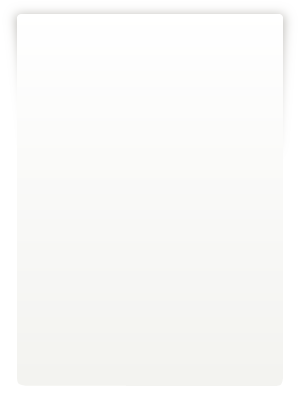
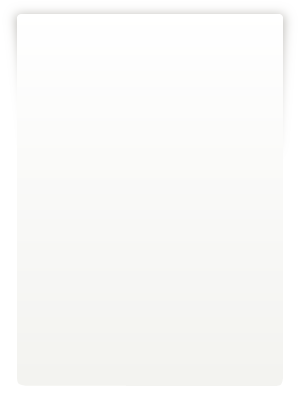
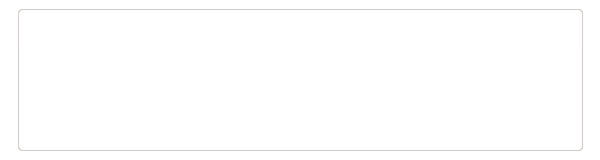
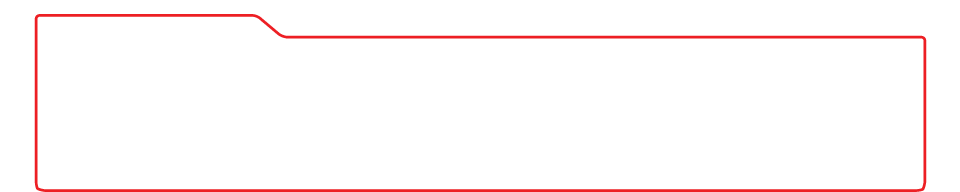
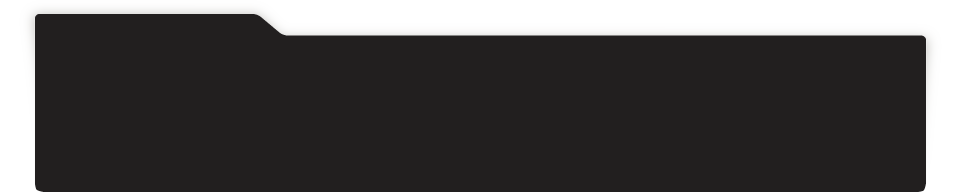
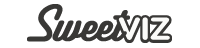
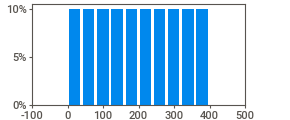
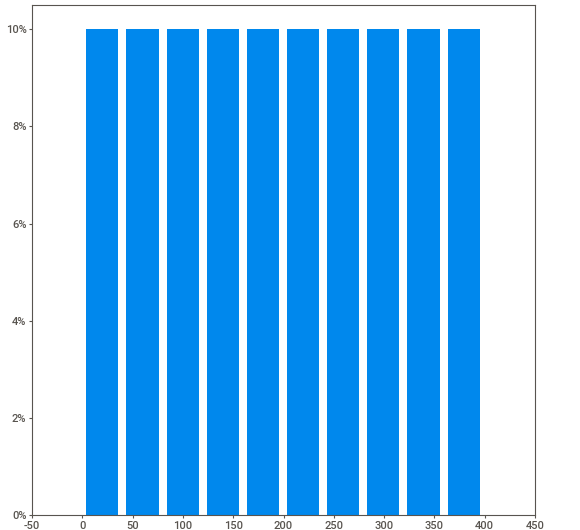
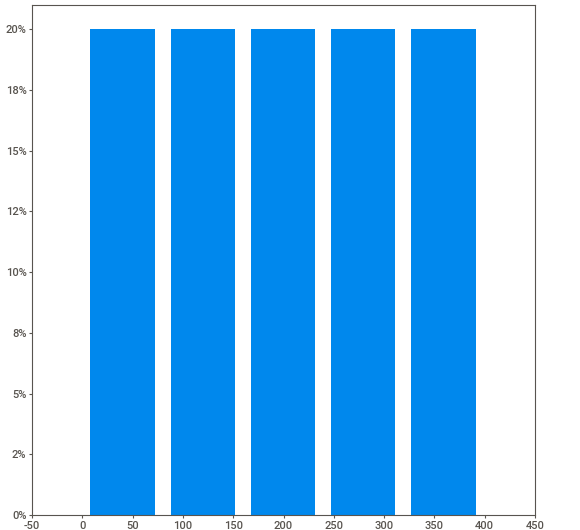
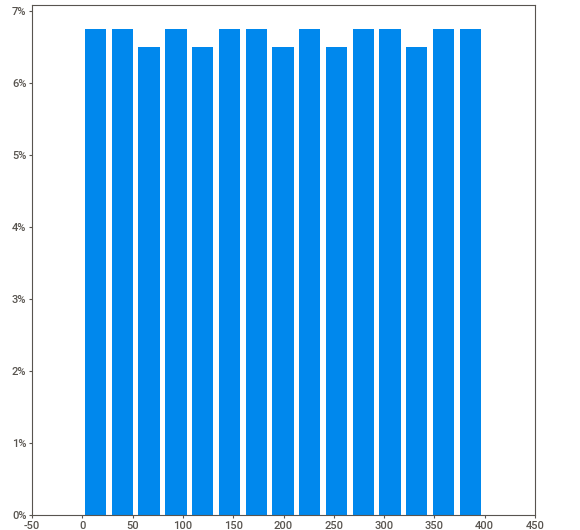
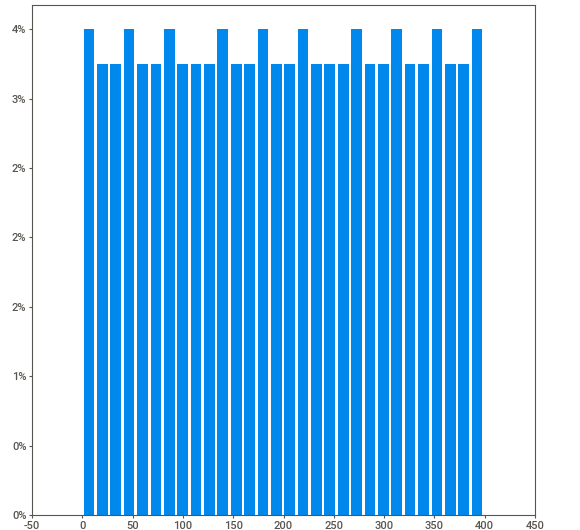
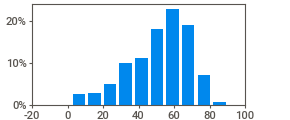
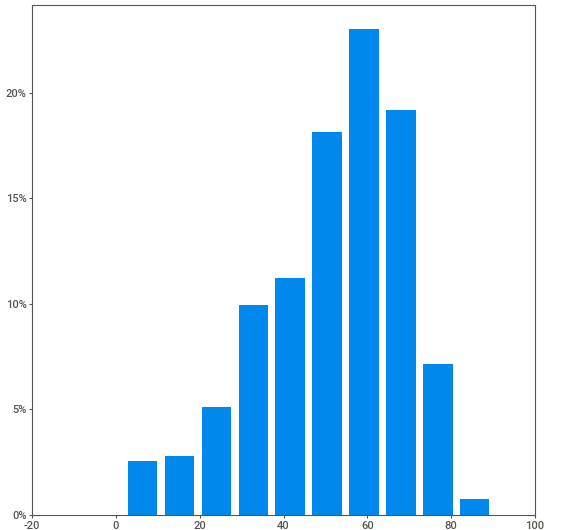
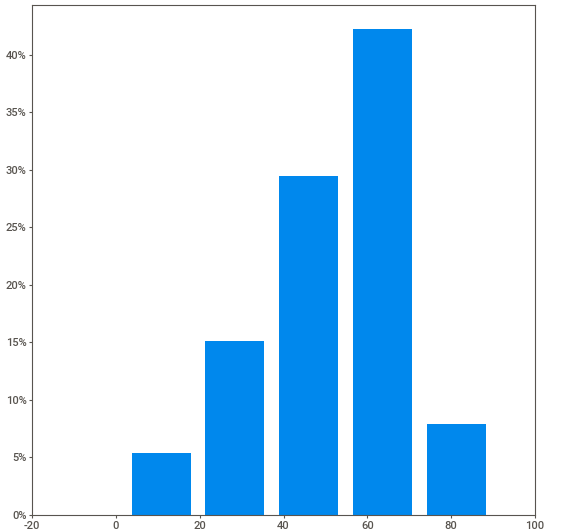
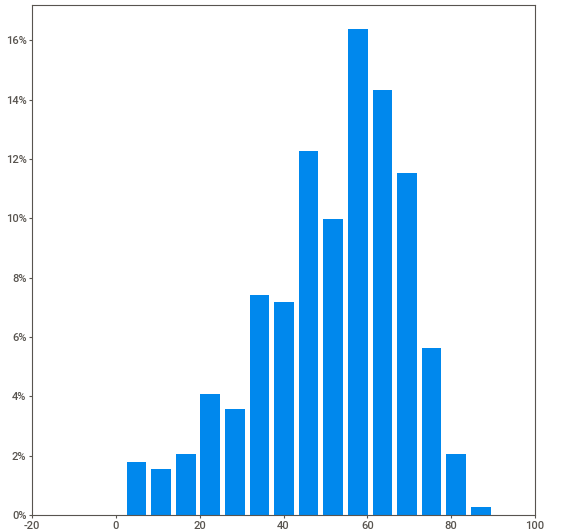
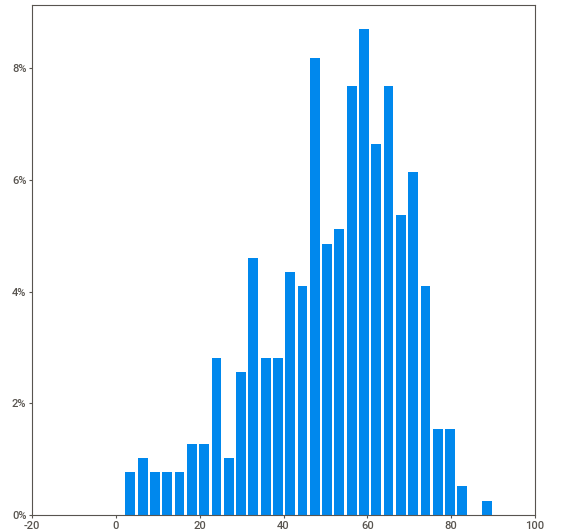
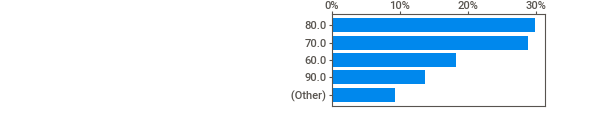
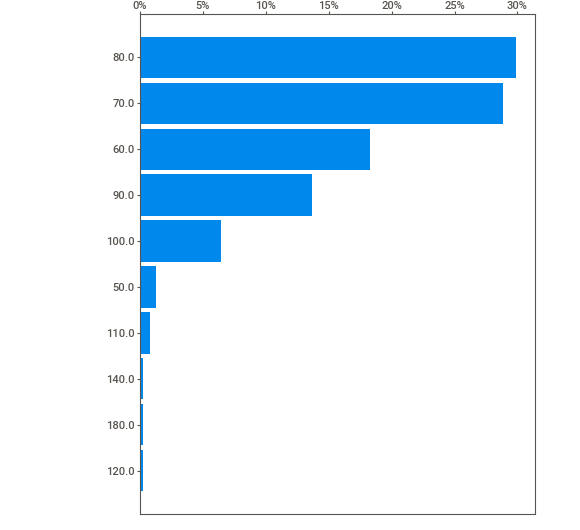
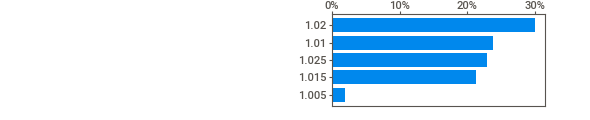
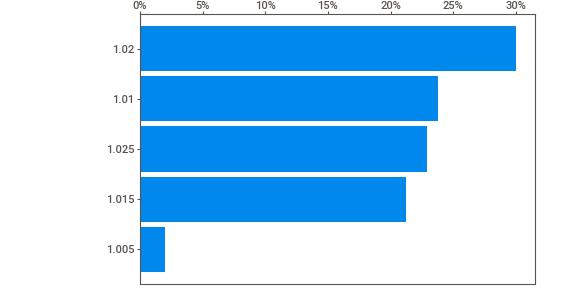
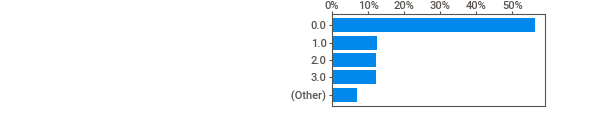
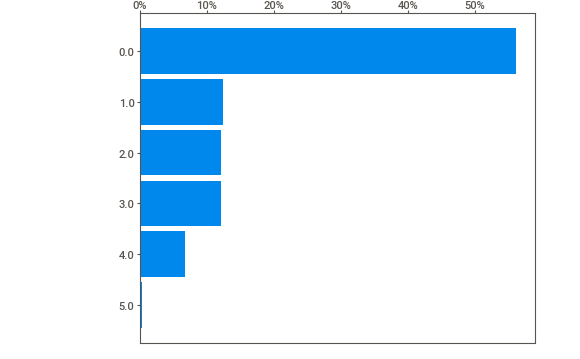
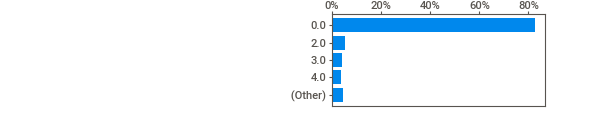
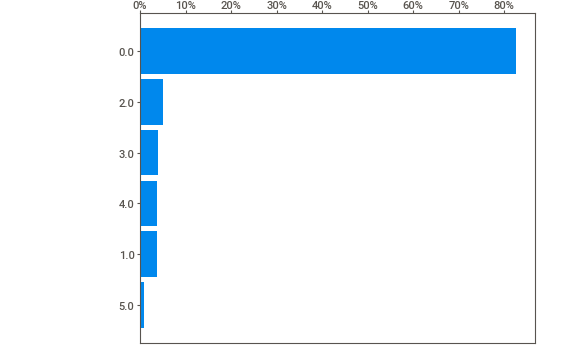
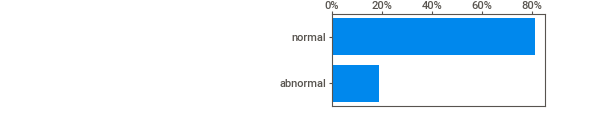
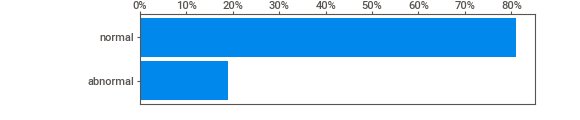
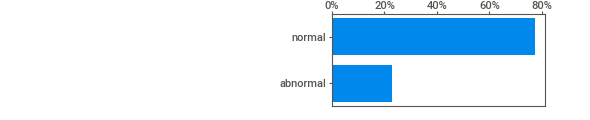
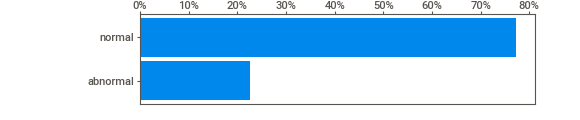
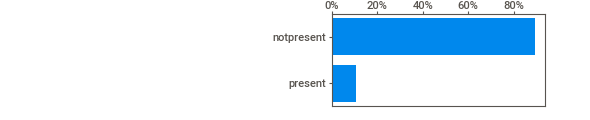
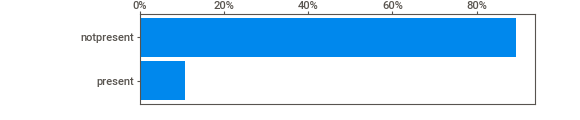
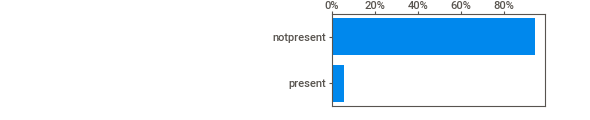
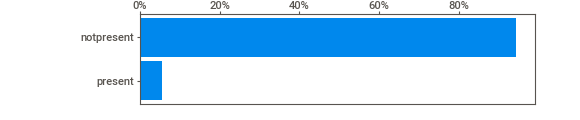
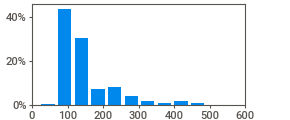
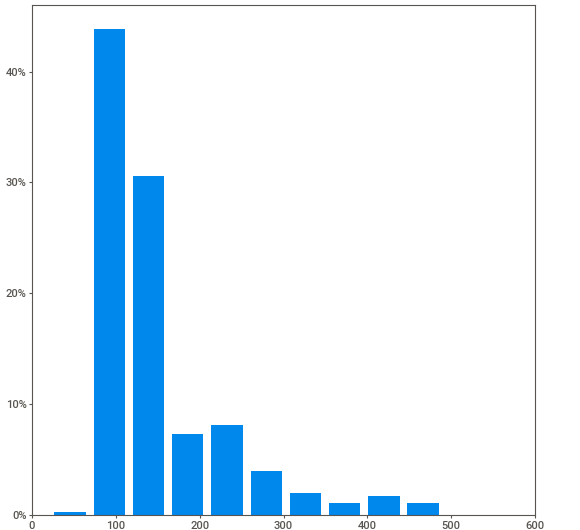
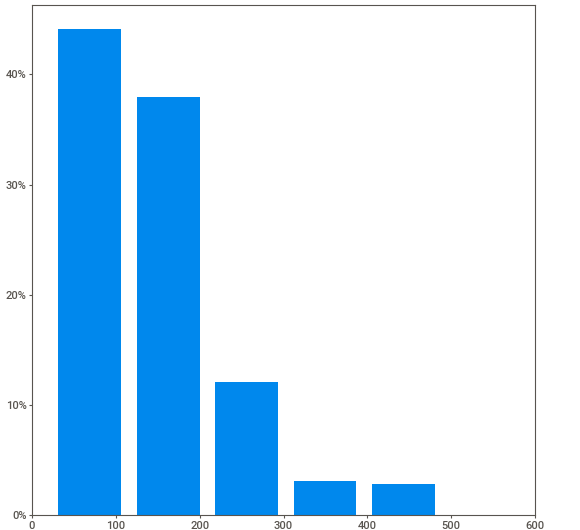
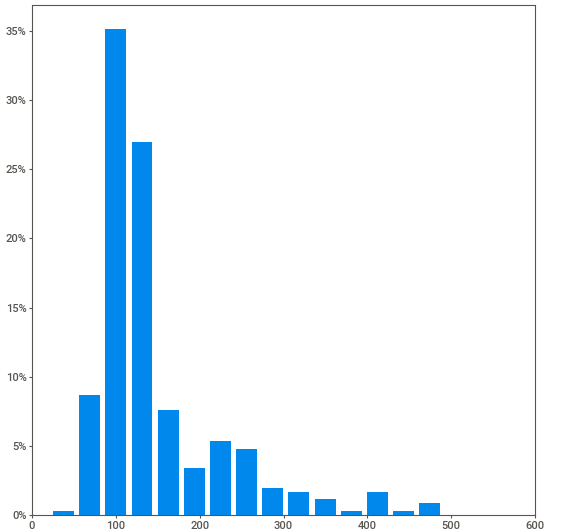
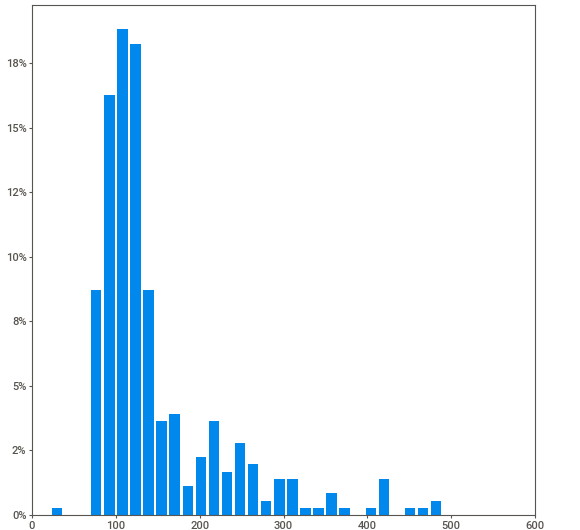
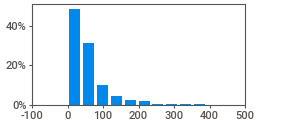
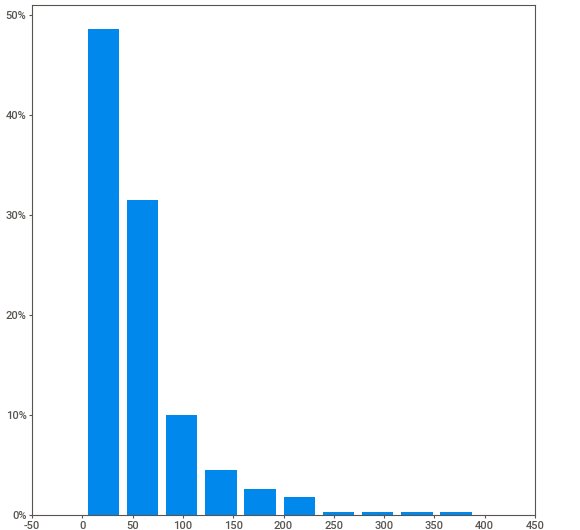
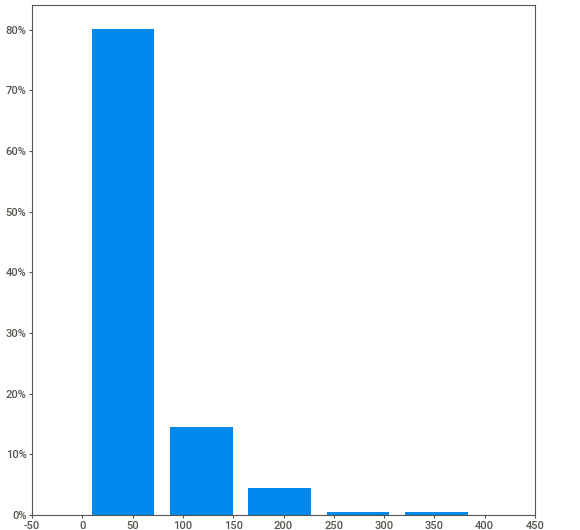
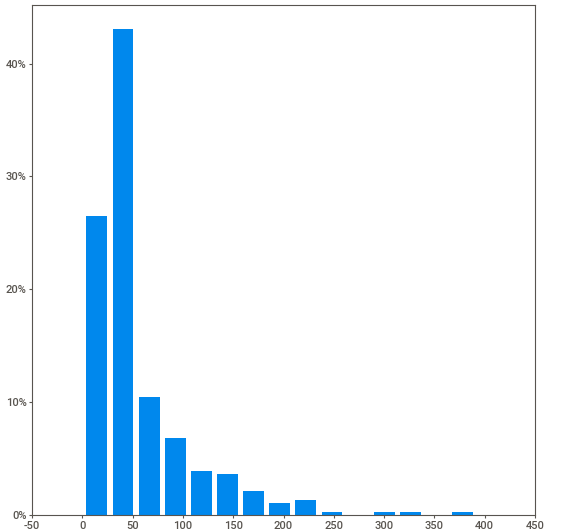
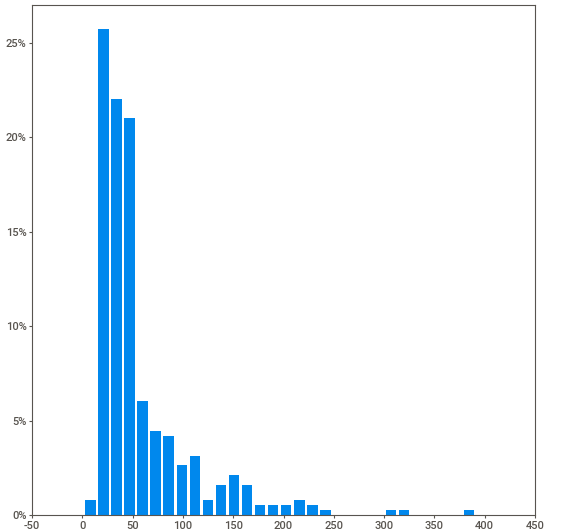
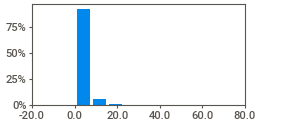
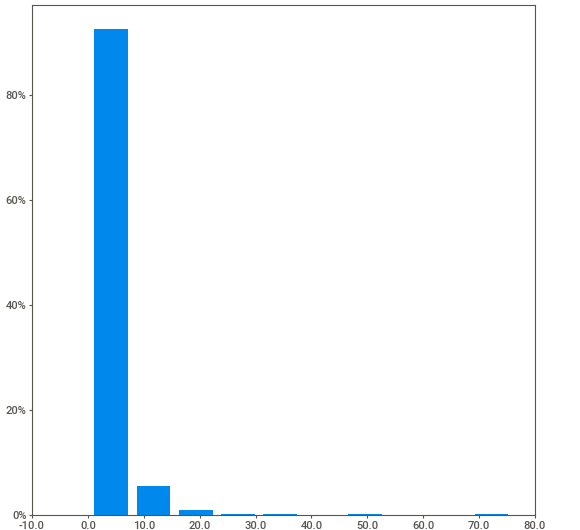
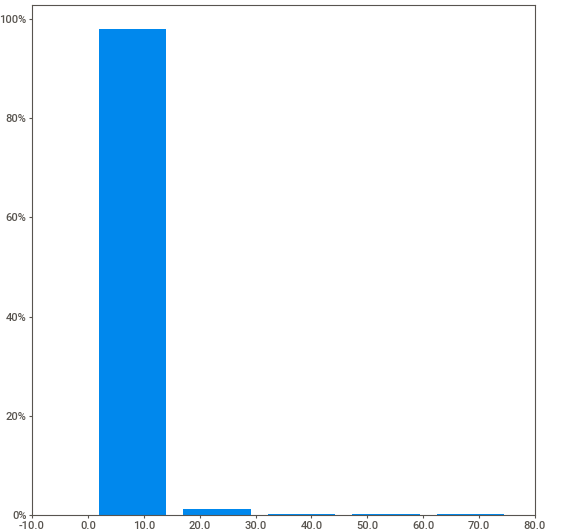
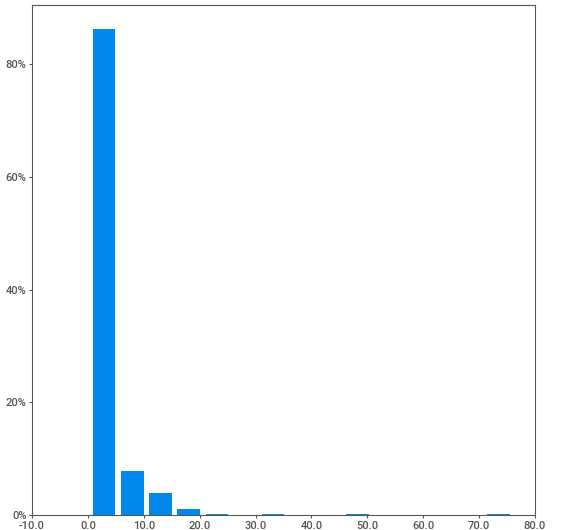
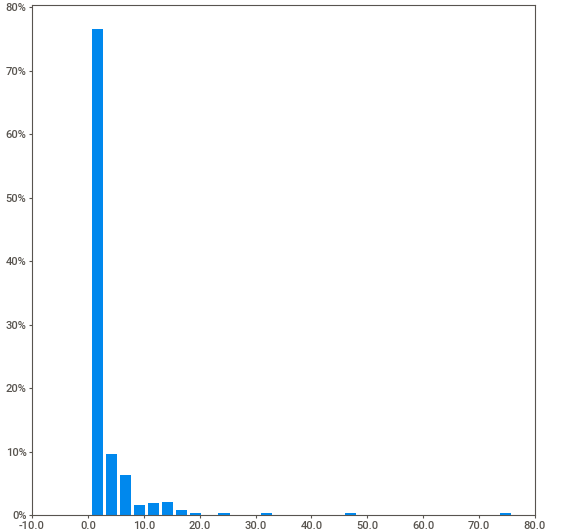
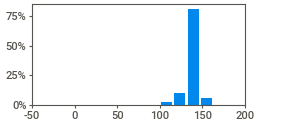
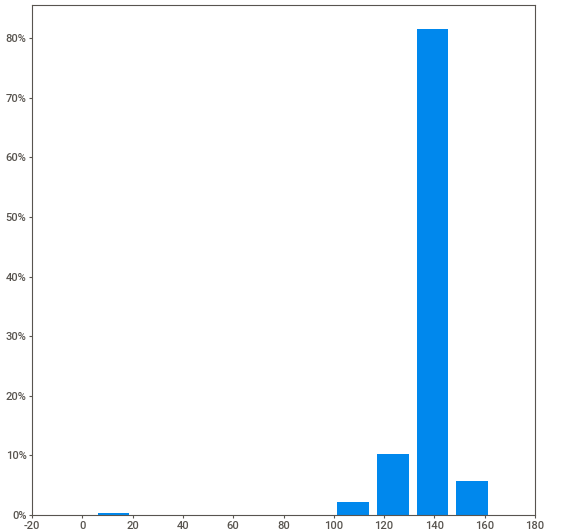
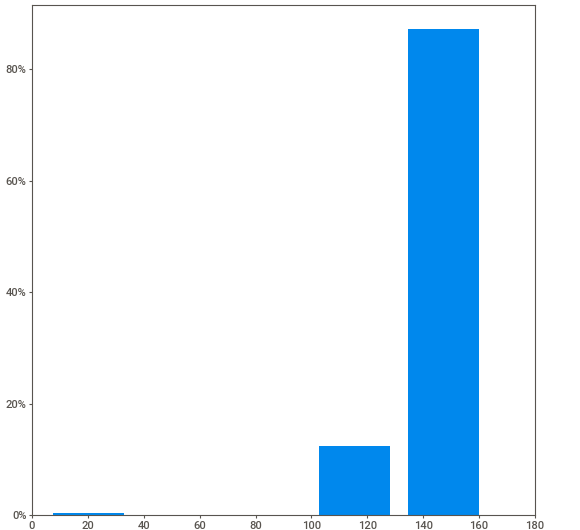
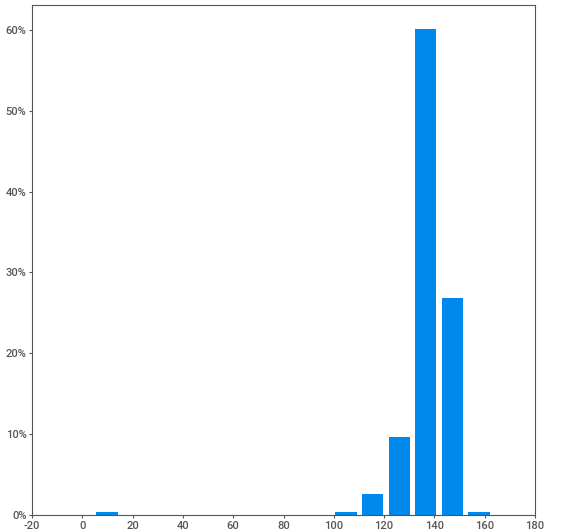
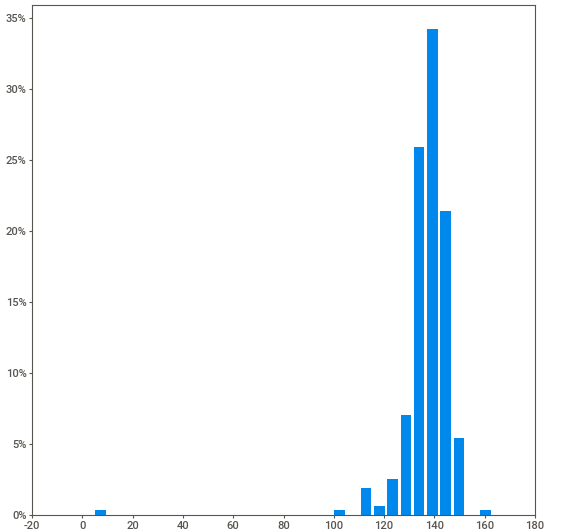
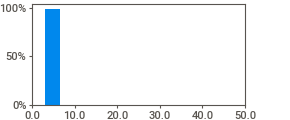
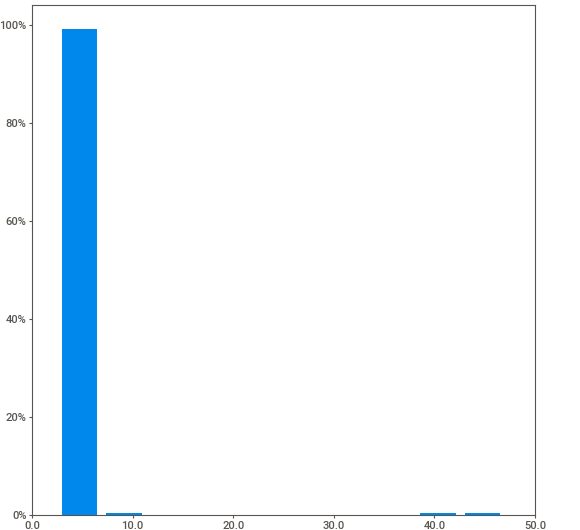
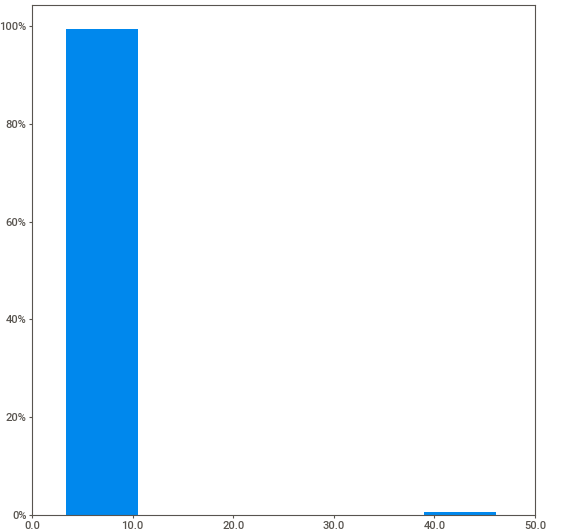
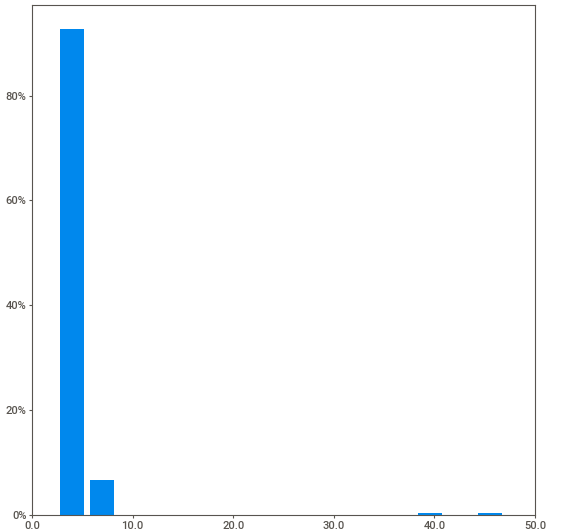
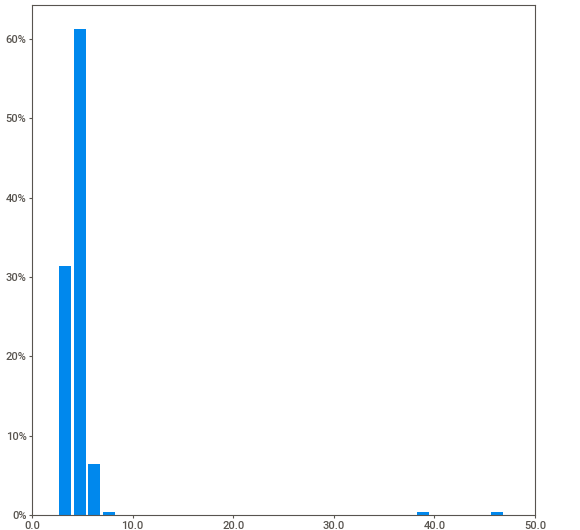
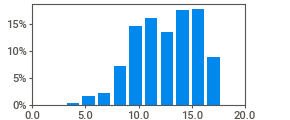
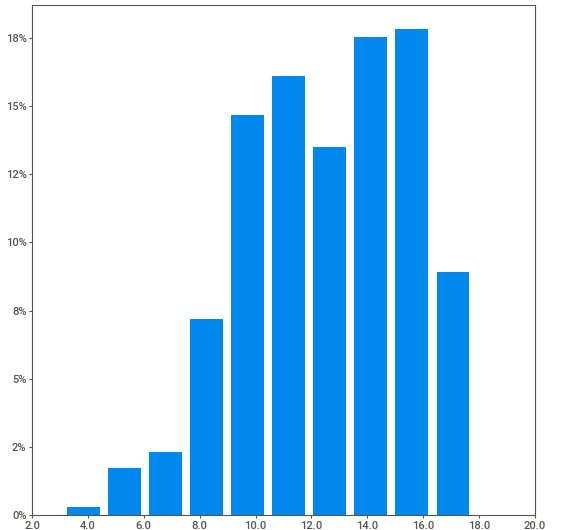
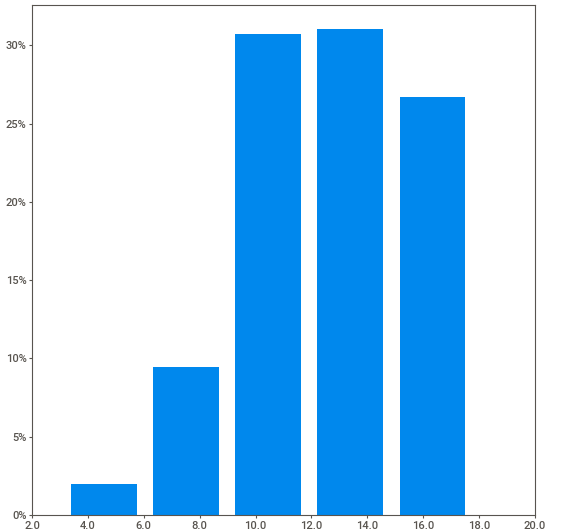
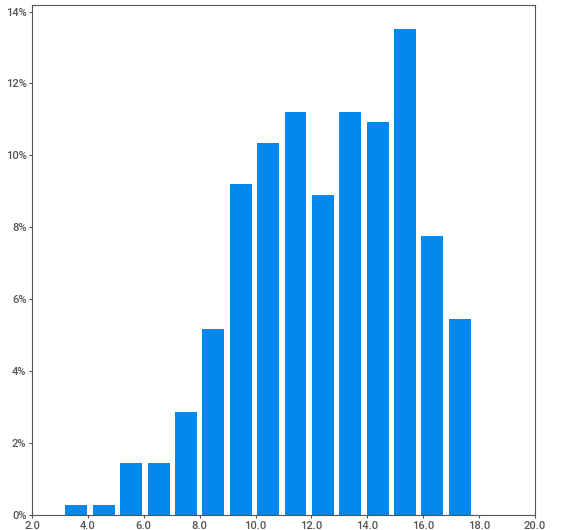
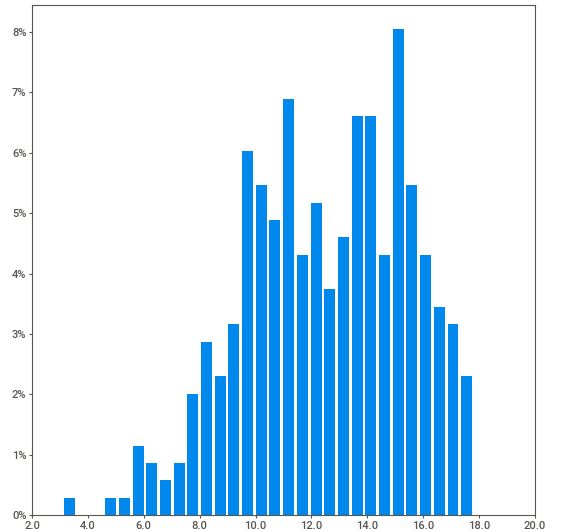
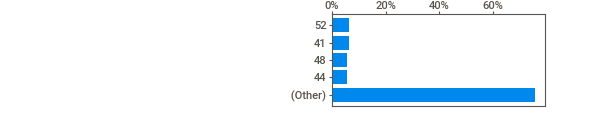
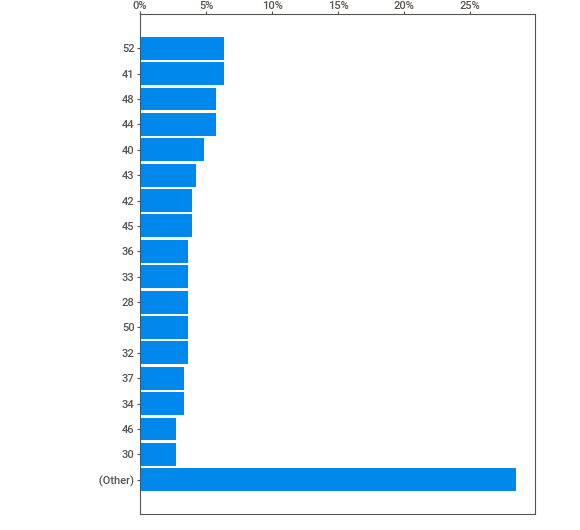
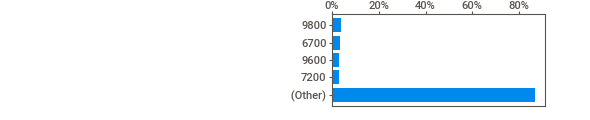
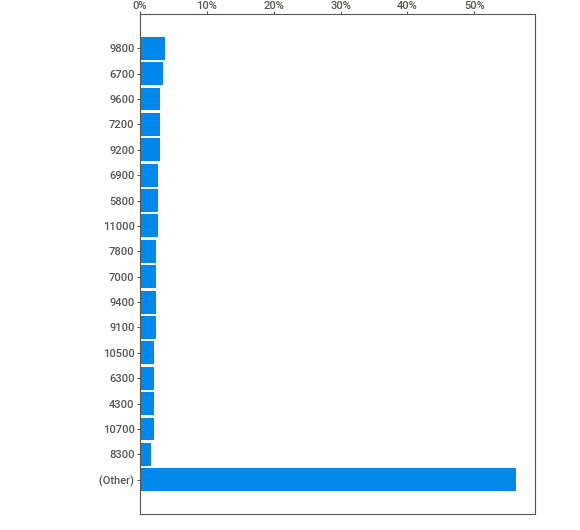
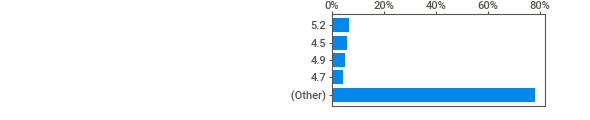
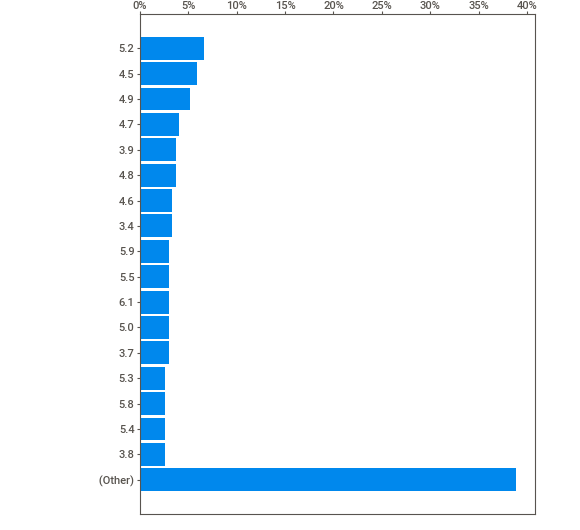
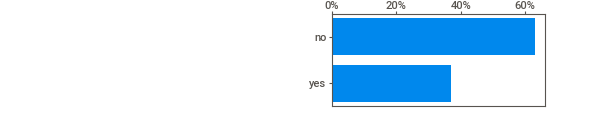
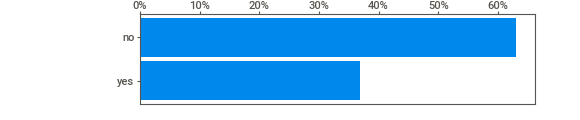
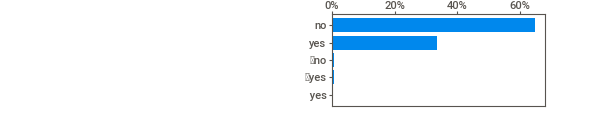
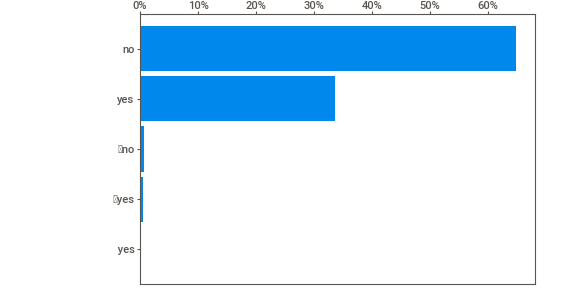
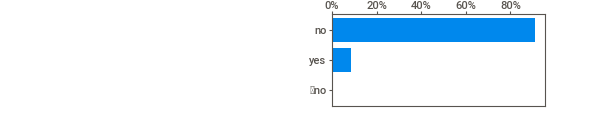
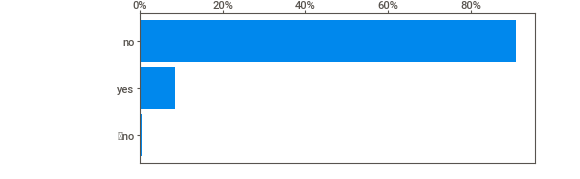
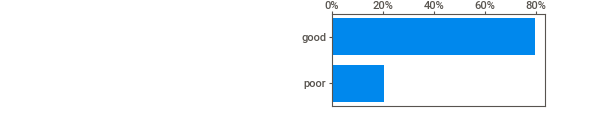
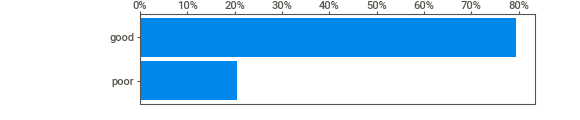
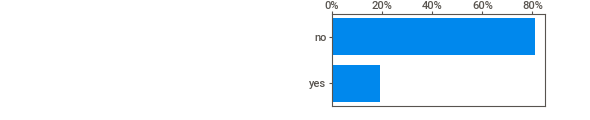
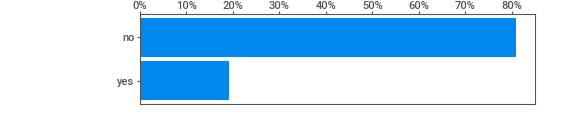
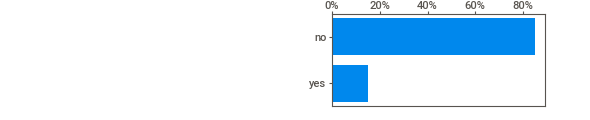
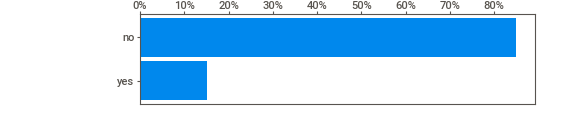
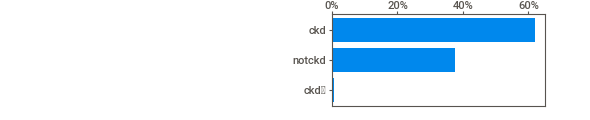
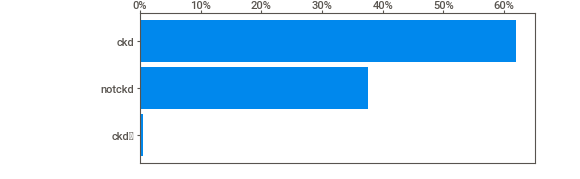
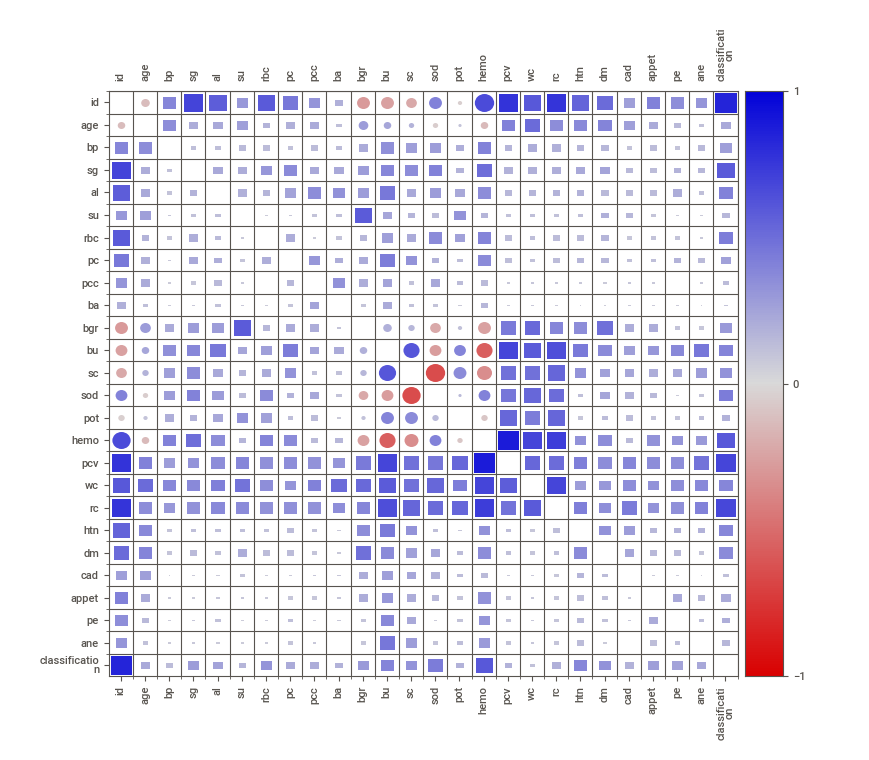
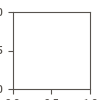

In [9]:
import sweetviz as sv
# Generate a report using Sweetviz
report = sv.analyze(df)

# Display the report in the notebook
report.show_notebook()

In [10]:
#Finding missing values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

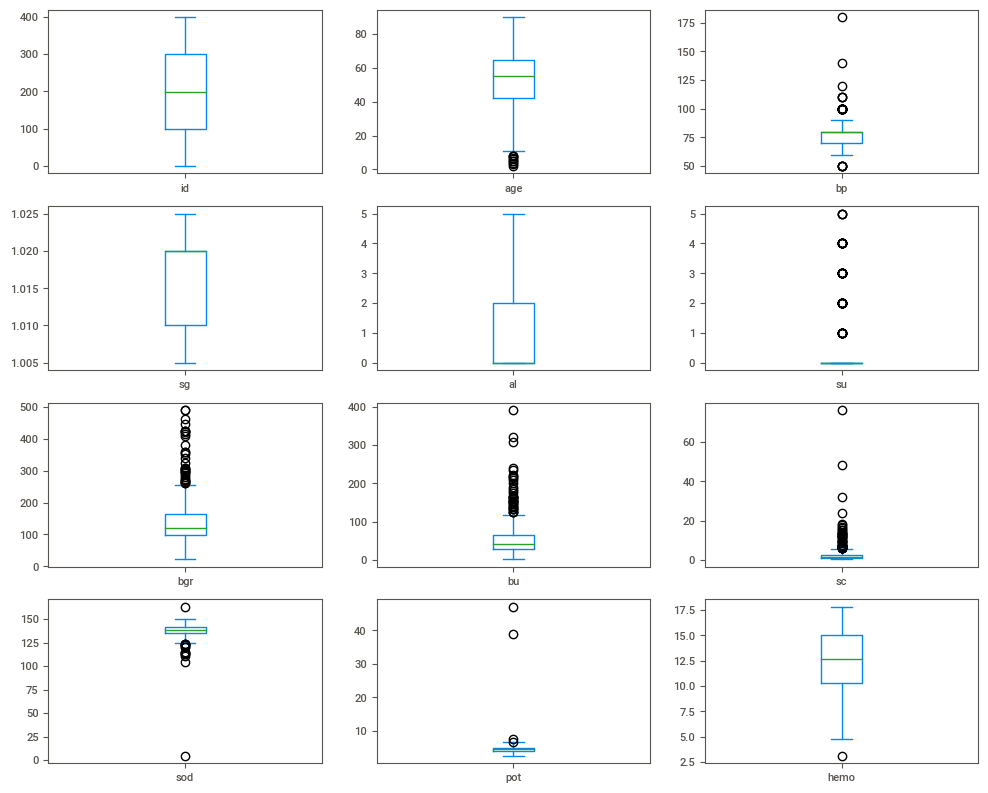

In [11]:
# Display boxplots for each numeric feature

import matplotlib.pyplot as plt
df.plot(kind = 'box', subplots = True, figsize = (12, 20), layout=(8, 3))
plt.show()

In [12]:
df['su'].value_counts()

0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


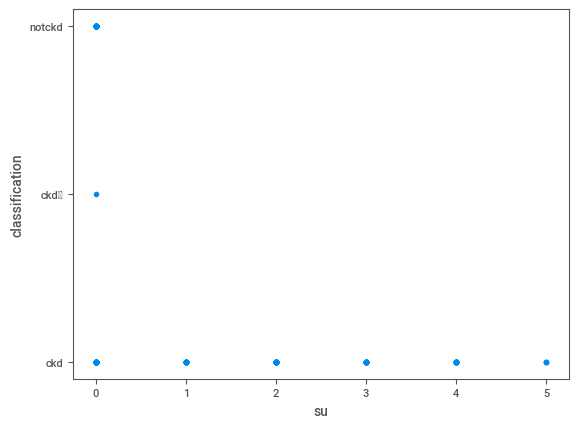

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df['su'], df['classification'])
plt.xlabel('su')
plt.ylabel('classification')
plt.show()

Based on the scatter plot, there seems to be a weak relationship between the 'su' variable and the 'classification' variable. The regression line has a slight slope, indicating a positive correlation, but the data points are quite scattered and do not follow a clear pattern. This suggests that 'su' may not be a strong predictor of the 'classification' variable. 

'su' contains mostly 0s and has only one line in the box plot, it means that the distribution of the variable is highly skewed, and most of the values are concentrated around 0.

'su' is not informative for predicting the target variable and can be dropped from the analysis. 

In [14]:
df.drop(['su', 'id'], axis=1, inplace=True)

###1.Outliers

Based on the boxplots, it looks like some of the variables have outliers that could potentially cause bias in descriptive statistics such as mean and standard deviation. For example, the variables 'age', 'blood pressure', and 'serum creatinine' have outliers that are significantly far from the median line, indicating that the mean may be influenced by these extreme values. 

so im gonna handle outliers before handling missing values, because  missing values are in the same variable as the outliers. So the outliers can have a significant impact on the mean and standard deviation, which are commonly used for imputing missing values.

 Replacing outliers before imputing missing values  it can help reduce the impact of the outliers on the imputed values.
  
 Additionally, imputing missing values before addressing outliers can lead to biased estimates and incorrect conclusions.

Replacing outliers before imputing missing values is a common data preprocessing technique known as "Winsorization".

 Winsorization is a technique that replaces extreme values with less extreme values, typically by setting them to the nearest non-outlying value.

So im gonna first:
####Evaluate the distribution of the variables before applying Winsorization.

In [15]:
# Define a list of numerical variables
numerical_vars = ['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

# Loop over each numerical variable and calculate the proportion of outliers
for var in numerical_vars:
    # Calculate the IQR of the variable
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1

    # Calculate the upper and lower bounds for outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # Count the number of observations outside the bounds
    num_outliers = df[(df[var] > upper_bound) | (df[var] < lower_bound)].shape[0]
    total_obs = df.shape[0]

    # Calculate the proportion of observations outside the bounds
    prop_outliers = num_outliers / total_obs

    # Print the results
    print('Variable:', var)
    print('Upper bound:', upper_bound)
    print('Lower bound:', lower_bound)
    print('Number of outliers:', num_outliers)
    print('Total number of observations:', total_obs)
    print('Proportion of outliers:', prop_outliers)
    print('\n')

Variable: age
Upper bound: 98.25
Lower bound: 8.25
Number of outliers: 10
Total number of observations: 400
Proportion of outliers: 0.025


Variable: bp
Upper bound: 95.0
Lower bound: 55.0
Number of outliers: 36
Total number of observations: 400
Proportion of outliers: 0.09


Variable: sg
Upper bound: 1.0350000000000001
Lower bound: 0.995
Number of outliers: 0
Total number of observations: 400
Proportion of outliers: 0.0


Variable: al
Upper bound: 5.0
Lower bound: -3.0
Number of outliers: 0
Total number of observations: 400
Proportion of outliers: 0.0


Variable: bgr
Upper bound: 259.0
Lower bound: 3.0
Number of outliers: 34
Total number of observations: 400
Proportion of outliers: 0.085


Variable: bu
Upper bound: 124.5
Lower bound: -31.5
Number of outliers: 38
Total number of observations: 400
Proportion of outliers: 0.095


Variable: sc
Upper bound: 5.6499999999999995
Lower bound: -1.9499999999999997
Number of outliers: 51
Total number of observations: 400
Proportion of outliers: 0

Based on the analysis, it can be seen that the variables "age", "bp", "su", "bgr", "bu", "sc", "sod",  and "pot" have outliers. The proportion of outliers for these variables ranges from 0.0025 to 0.1525, indicating that some variables have a small number of outliers while others like  "su" and "bp" still have relatively high proportions of outliers compared to the other variables.

  None of the variables have a proportion of outliers greater than 30%, so it may  be appropriate to say that the variables have a few extreme values.

  Visualizing the Box plots , the Histograms and the Summary statistics, such as the mean, median, standard deviation, and range we can say that the variables have a skewed distribution . 


The variable "sg" and "al" do not have any outliers based on the IQR method. The variable "hemo" has only one outlier, which suggests that it may not be necessary to address outliers for this variable before imputing missing values .
 




####Apply Winsorization

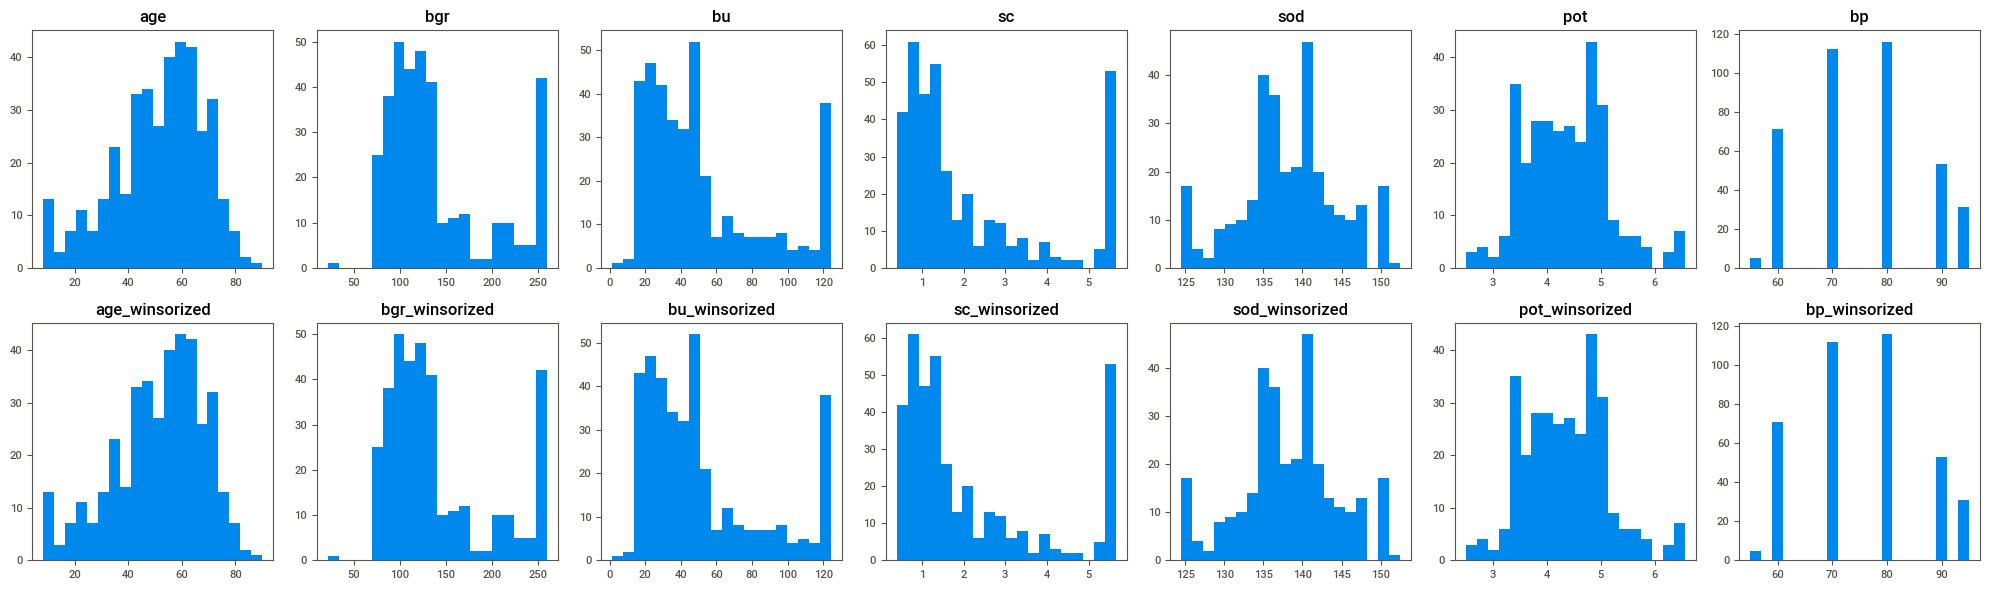

In [16]:

import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


# Specify the variables to Winsorize
vars_to_winsorize = ['age','bgr', 'bu', 'sc', 'sod','pot','bp']

# Apply Winsorization to the specified variables
for var in vars_to_winsorize:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])

# Plot histograms to compare the original variables with Winsorized variables
fig, axs = plt.subplots(2, 7, figsize=(20, 6))

for i, var in enumerate(vars_to_winsorize):
    axs[0,i].hist(df[var].dropna(), bins=20)
    axs[0,i].set_title(var)
    axs[1,i].hist(df[var].dropna(), bins=20)
    axs[1,i].set_title(var+'_winsorized')
    
plt.tight_layout()
plt.show()

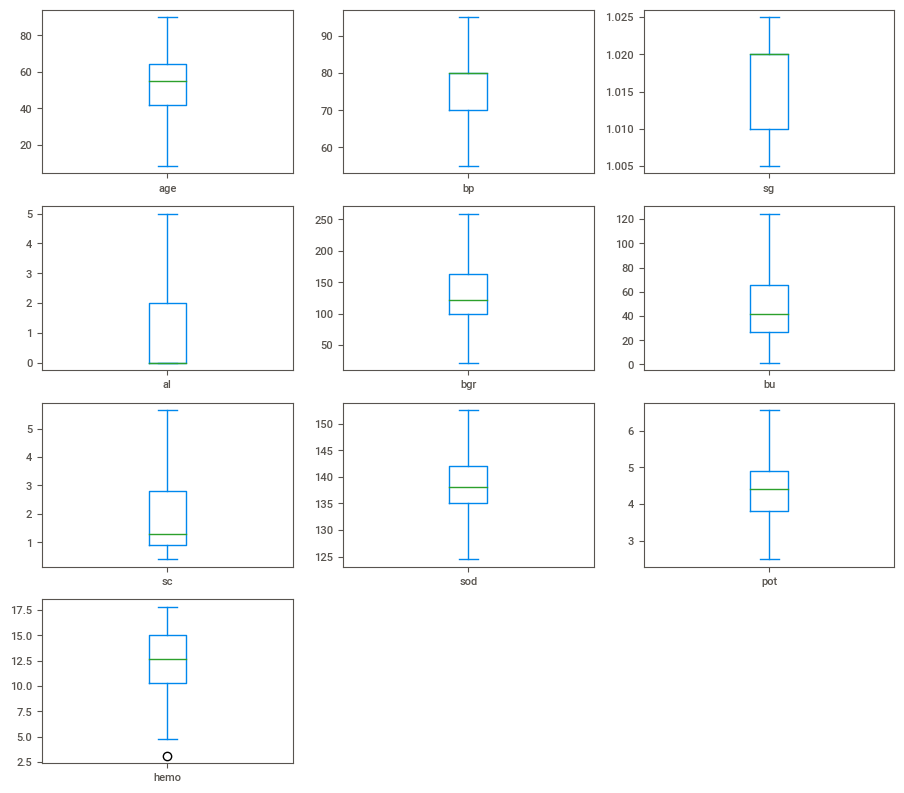

In [17]:
#check the outliers after appliying Winsorization
import matplotlib.pyplot as plt
df.plot(kind = 'box', subplots = True, figsize = (11, 20), layout=(8, 3))
plt.show()

From the histograms, we can observe that Winsorization has effectively reduced the number of extreme values in the data.  Winsorization adjusts extreme values to bring them closer to the rest of the data.

When visualized the  boxplots we can say that the Winsorization has successfully reduced the number of outliers and brought the distribution of the variable closer to normal.

###2.Missing values 

Here are some additional analyses and techniques that can be useful in determining the nature of missing data:

<Axes: >

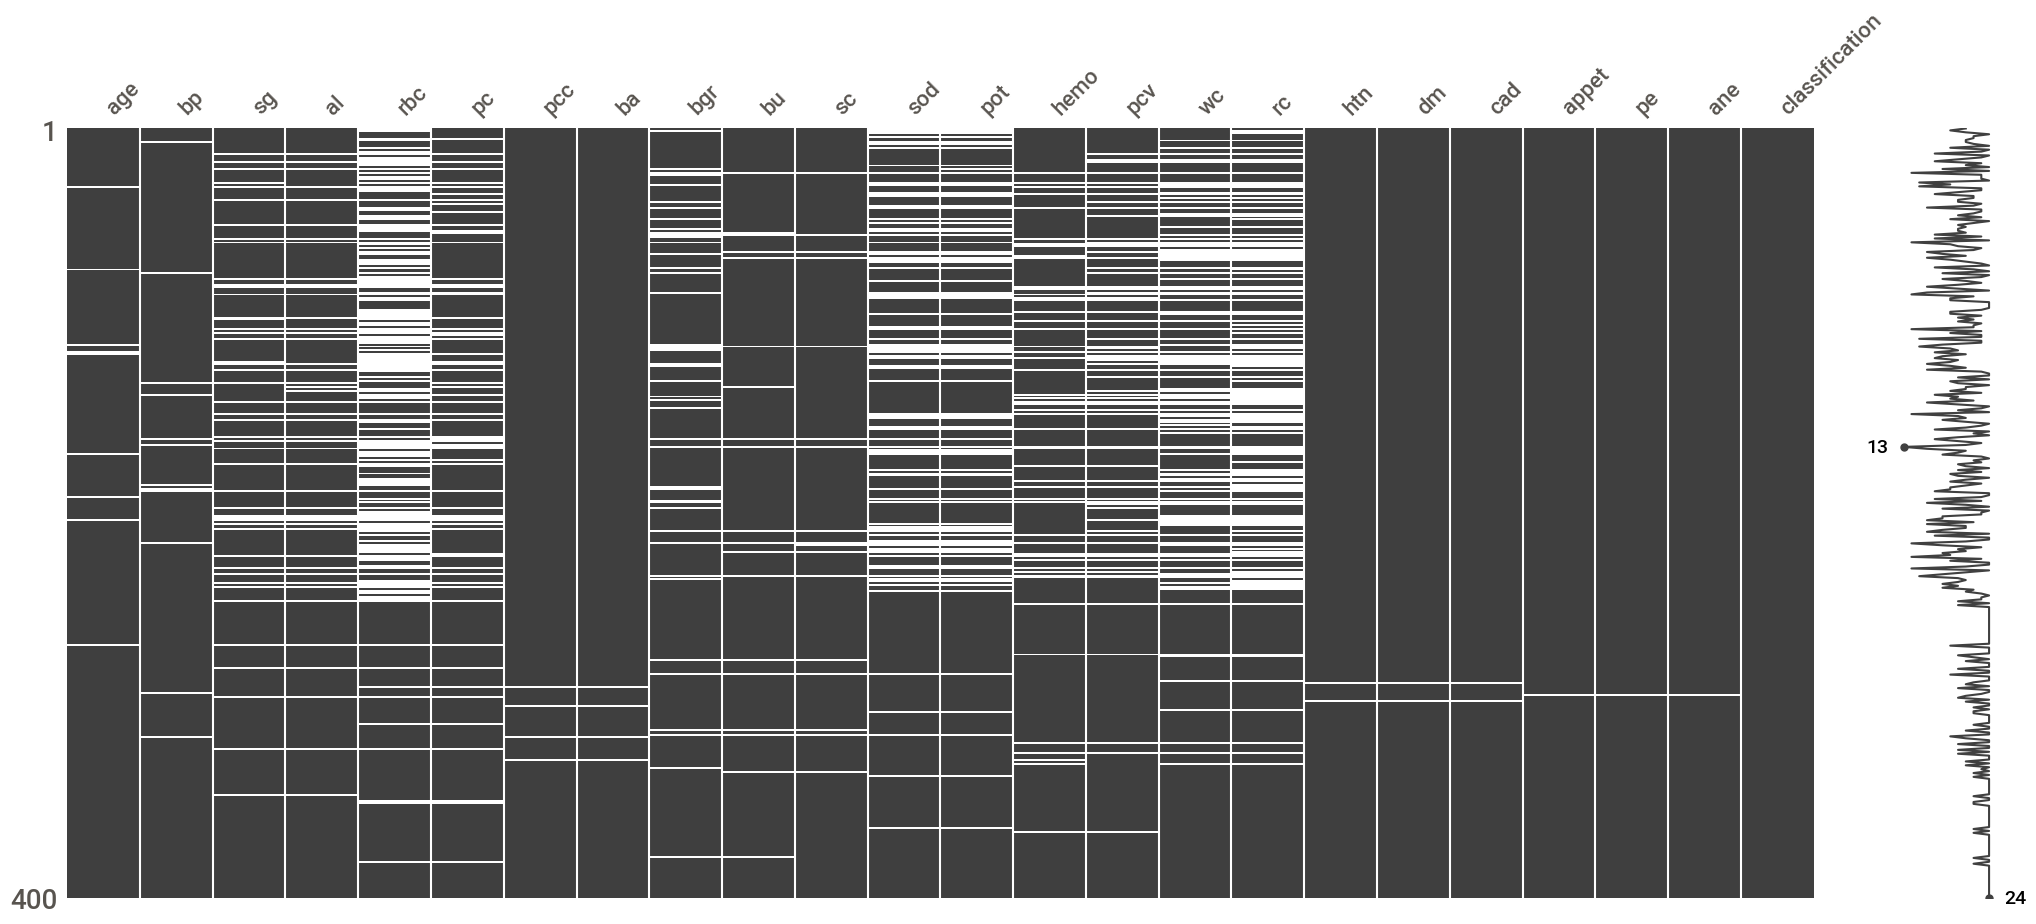

In [18]:
# Visualize the missing values pattern using missingno library
import missingno as msno
msno.matrix(df)

I used the missingno library to visualize the missing values pattern in the dataset. The msno.matrix function creates a matrix plot that shows the locations of missing values in the dataset. The plot has one row for each variable in the dataset, and the columns represent the observations. The white bars in the plot represent the missing values, and the dark bars represent the non-missing values.

The plot shows that some variables have a large number of missing values, such as rbc, rc, and wc, while other variables have only a few missing values, such as age and bp. .





<Axes: >

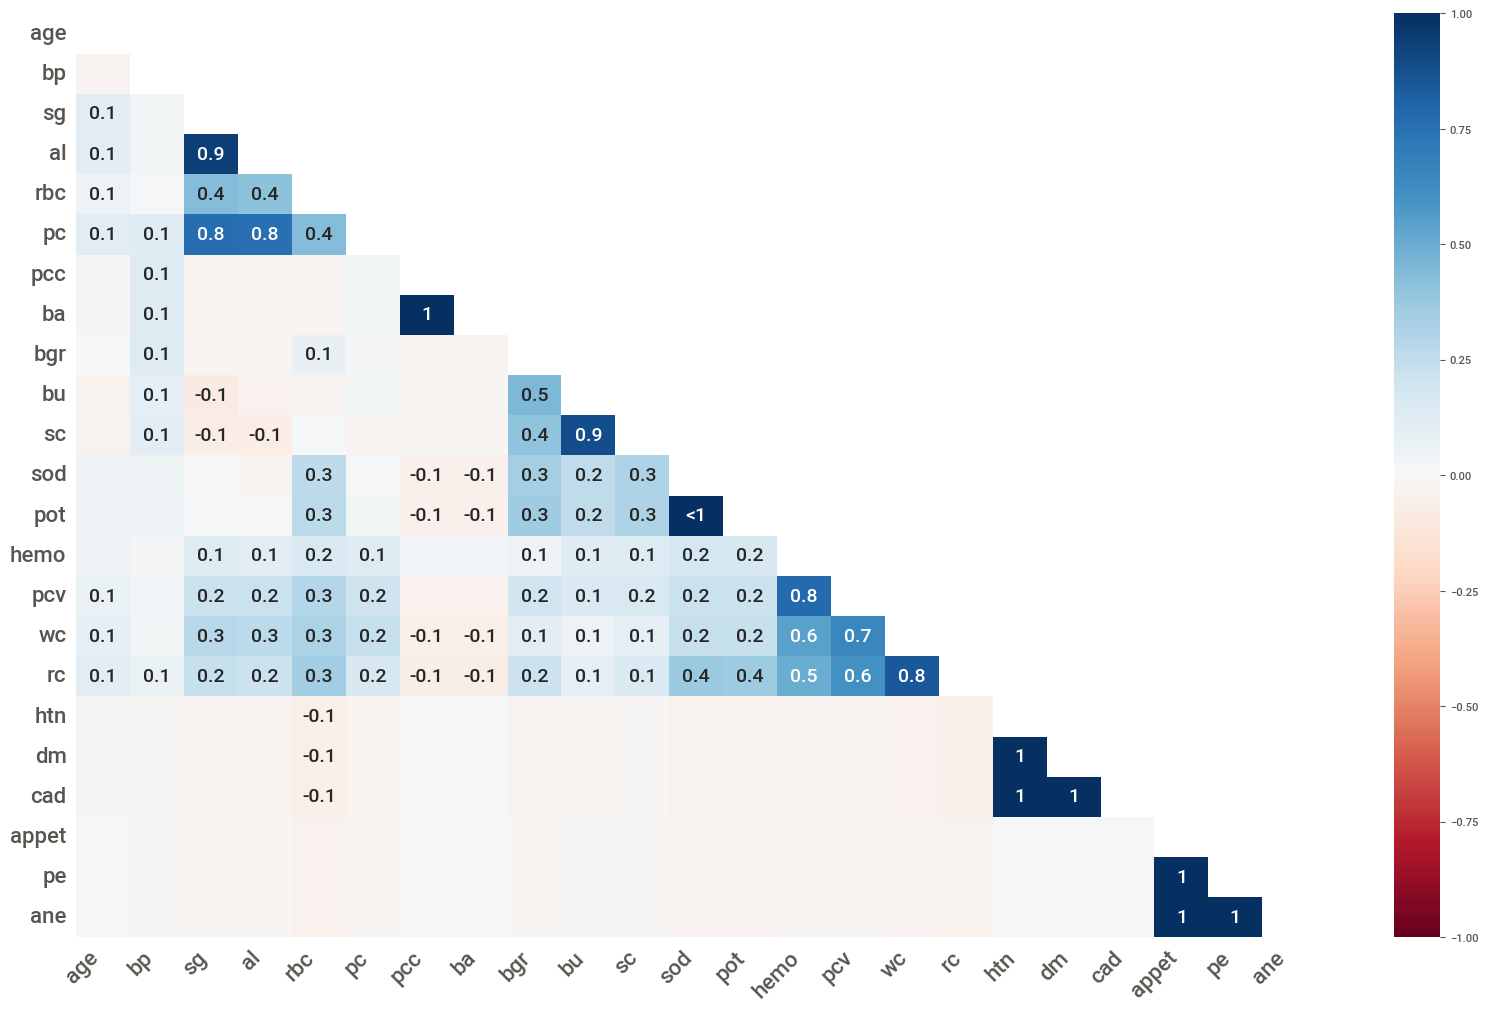

In [19]:
# Calculate the missingness correlation matrix using missingno library
msno.heatmap(df)

 The msno.heatmap function creates a heatmap that shows the correlation between the missing values in different variables. The heatmap has one row and column for each variable in the dataset, and the color of each square represents the correlation between the missingness of the two variables. A dark color indicates a high correlation, while a light color indicates a low correlation.

The heatmap shows that some variables have a high correlation in their missingness, such as rc and wc, pcv and hemo, and sod and pot. This indicates that the missing values in these variables occur together, which may suggest a systematic reason for the missingness.



Overall, the heatmap suggests that the missing data in the kidney disease dataset is not completely random (MCAR), as there are correlations between the missingness of different variables.

Therefore, single imputation cannot be used for handling
missing values.

In this case , multiple imputations (MI) for replacing
missing values in the CKD dataset. 





####Data preparation before Multiple Imputation 

In [20]:
# List of categorical variables
cat_vars = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Column replacements for categorical variables
col_replacements = {
    'ane': {'yes': 1, 'no': 0},
    'pe': {'yes': 1, 'no': 0},
    'htn': {'yes': 1, 'no': 0},
    'appet': {'good': 1, 'poor': 0},
    'ba': {'present': 1, 'notpresent': 0},
    'pcc': {'present': 1, 'notpresent': 0},
    'rbc': {'normal': 1, 'abnormal': 0}
    
    
}

# Replace values for categorical variables
for col, rep in col_replacements.items():
    df[col] = df[col].replace(rep)

# Convert 'pc' to integer and replace values
df['pc'] = df['pc'].astype(str).str.strip().replace({'normal': 1, 'abnormal': 0})

# Replace values for 'dm' column
df['dm'] = df['dm'].replace(['\tno', '\tyes', ' yes'], ['no', 'yes', 'yes'])
df['dm'] = df['dm'].astype(object).replace({'yes': 1, 'no': 0})

# Replace values for 'cad' column
df['cad'] = df['cad'].replace(['\tno', '\tyes'], ['no', 'yes'])
df['cad'] = df['cad'].astype(object).replace({'yes': 1, 'no': 0})



# Create a new DataFrame with only categorical variables
cat_vars_transformed = df[cat_vars]

# Drop the original categorical variables from the DataFrame
df.drop(columns=cat_vars, inplace=True)

# Concatenate the transformed categorical variables and numeric variables DataFrames
df_final = pd.concat([df, cat_vars_transformed], axis=1)

# Show the final DataFrame
print(df_final.head())

     age    bp     sg   al    bgr    bu   sc    sod  pot  hemo  ...  rbc pc  \
0  48.00  80.0  1.020  1.0  121.0  36.0  1.2    NaN  NaN  15.4  ...  NaN  1   
1   8.25  55.0  1.020  4.0    NaN  18.0  0.8    NaN  NaN  11.3  ...  NaN  1   
2  62.00  80.0  1.010  2.0  259.0  53.0  1.8    NaN  NaN   9.6  ...  1.0  1   
3  48.00  70.0  1.005  4.0  117.0  56.0  3.8  124.5  2.5  11.2  ...  1.0  0   
4  51.00  80.0  1.010  2.0  106.0  26.0  1.4    NaN  NaN  11.6  ...  1.0  1   

   pcc   ba  htn   dm  cad  appet   pe  ane  
0  0.0  0.0  1.0  1.0  0.0    1.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0    1.0  0.0  0.0  
2  0.0  0.0  0.0  1.0  0.0    0.0  0.0  1.0  
3  1.0  0.0  1.0  0.0  0.0    0.0  1.0  1.0  
4  0.0  0.0  0.0  0.0  0.0    1.0  0.0  0.0  

[5 rows x 24 columns]


In [21]:
df_final['cad'].value_counts()

0.0    364
1.0     34
Name: cad, dtype: int64

In [22]:
print(df_final['pcv'].unique())
print(df_final['wc'].unique())
print(df_final['rc'].unique())

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200' '5900' '9300' '9700' '5100' '6600']
['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3

In [23]:
# Convert pcv, wc, and rc to numeric data types
df_final['pcv'] = pd.to_numeric(df_final['pcv'], errors='coerce')
df_final['wc'] = pd.to_numeric(df_final['wc'], errors='coerce')
df_final['rc'] = pd.to_numeric(df_final['rc'], errors='coerce')

####Multiple Imputation 

In [24]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression, LogisticRegression




# define continuous and categorical variables
continuous_vars = ['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
cat_vars_transformed = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# make a copy of the data for imputation
impute_data = df_final.copy()



# Impute missing values in continuous variables using IterativeImputer with LinearRegression
imputer_num = IterativeImputer(estimator=LinearRegression(), random_state=0  )
impute_data[continuous_vars] = imputer_num.fit_transform(impute_data[continuous_vars])



# Impute the missing values in categorical variables using IterativeImputer with LogisticRegression
imputer_cat = IterativeImputer(estimator=LogisticRegression(), random_state=0)
impute_data[cat_vars] = imputer_cat.fit_transform(impute_data[cat_vars])




# Compare the imputed and original datasets
print("Original Data:\n" , df.isna().sum()) # original missing values
print("\nImputed Data:\n", impute_data.isna().sum()) # imputed missing values

Original Data:
 age                 9
bp                 12
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
classification      0
dtype: int64

Imputed Data:
 age               0
bp                0
sg                0
al                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
classification    0
rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
dtype: int64


###3.Data Reduction

<ipython-input-25-8659faecb643>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = impute_data.corr()


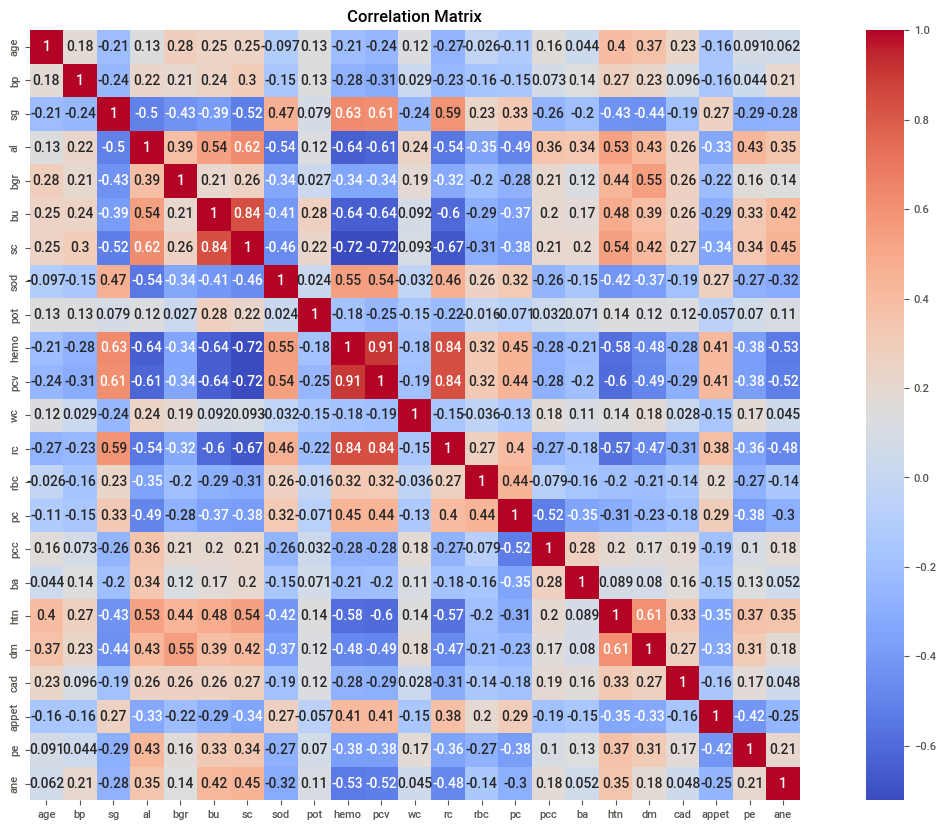

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt





# Compute the correlation matrix
corr = impute_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(17,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

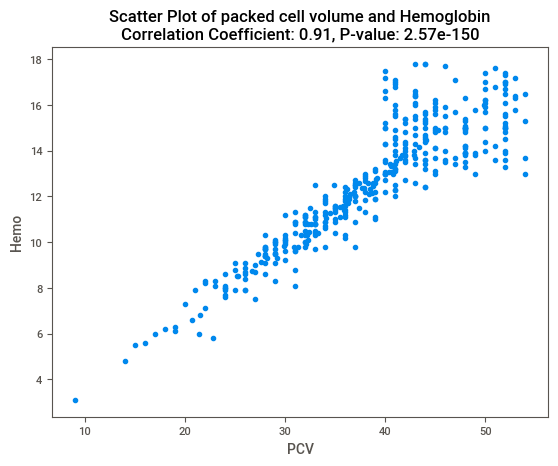

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value for pcv and hemo
corr, p_val = pearsonr(impute_data['pcv'], impute_data['hemo'])

# Create scatter plot between pcv and hemo
plt.scatter(impute_data['pcv'], impute_data['hemo'])
plt.title(f'Scatter Plot of packed cell volume and Hemoglobin\nCorrelation Coefficient: {corr:.2f}, P-value: {p_val:.2e}')
plt.xlabel('PCV')
plt.ylabel('Hemo')
plt.show()

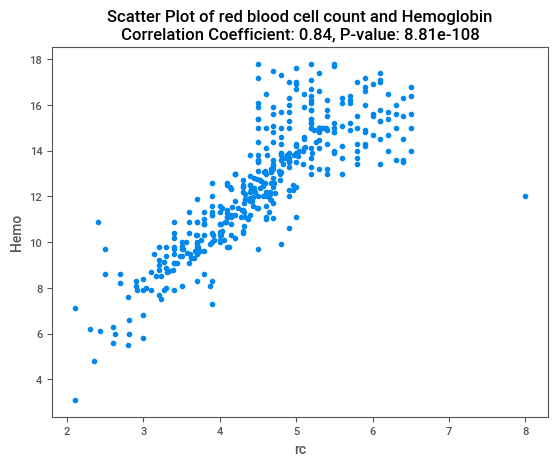

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value for pcv and hemo
corr, p_val = pearsonr(impute_data['rc'], impute_data['hemo'])

# Create scatter plot between pcv and hemo
plt.scatter(impute_data['rc'], impute_data['hemo'])
plt.title(f'Scatter Plot of red blood cell count and Hemoglobin\nCorrelation Coefficient: {corr:.2f}, P-value: {p_val:.2e}')
plt.xlabel('rc')
plt.ylabel('Hemo')
plt.show()

In [28]:
impute_data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

ckd and notckd are the two categories of the target variable, indicating whether a patient has chronic kidney disease or not. However, it's unclear what ckd\t represents, as it seems to be a typo or formatting error.
so im gonna replace any instances of ckd\t with ckd to make sure all the ckd cases are grouped together

In [29]:
impute_data['classification'] = impute_data['classification'].replace('ckd\t', 'ckd')

In [30]:
impute_data["classification"] = impute_data["classification"].replace({"ckd": 1, "notckd": 0, })
impute_data["classification"] = impute_data["classification"].astype(int)
impute_data['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

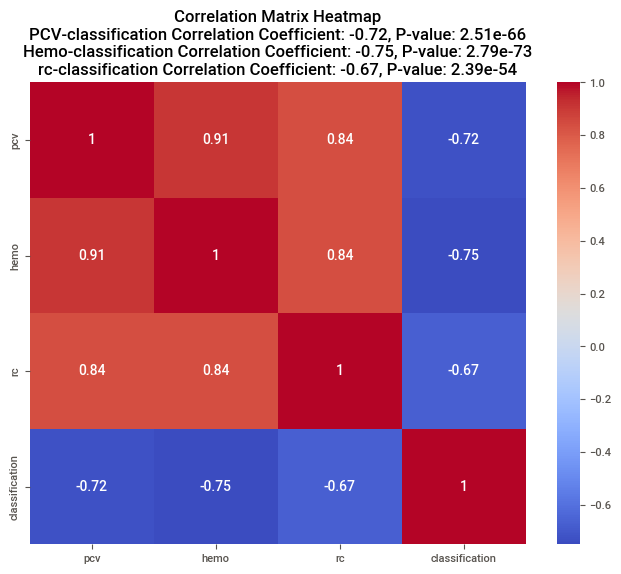

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value for pcv and classification
pcv_corr_coef, pcv_p_val = pearsonr(impute_data['pcv'], impute_data['classification'])
hemo_corr_coef, hemo_p_val = pearsonr(impute_data['hemo'], impute_data['classification'])
rc_corr_coef, rc_p_val = pearsonr(impute_data['rc'], impute_data['classification'])

# Create a correlation matrix between pcv, hemo, and classification
corr = impute_data[['pcv', 'hemo','rc', 'classification']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix Heatmap\nPCV-classification Correlation Coefficient: {pcv_corr_coef:.2f}, P-value: {pcv_p_val:.2e}\nHemo-classification Correlation Coefficient: {hemo_corr_coef:.2f}, P-value: {hemo_p_val:.2e}\nrc-classification Correlation Coefficient: {rc_corr_coef:.2f}, P-value: {rc_p_val:.2e}")
plt.show()

 pcv and hemo have a strong negative correlation with the target variable (classification). Since pcv and hemo are highly correlated with each other .

 Both packed cell volume and hemoglobin  can be indicative of CKD. In fact, pcv and hemo are closely related and tend to decrease together in CKD patients. However, some studies found that hemoglobin was a more sensitive marker of CKD than pcv, as it was less affected by factors such as age, sex, and hydration status. Hemoglobin levels were also found to be a better predictor of the risk of CKD progression and cardiovascular disease than pcv. 

Also red blood cell count (rc) is an important measure in diagnosing CKD and assessing anemia, it is not considered a better indicator of CKD than hemoglobin. 



( Shastri S, Tangri N, Tighiouart H, et al. Hemoglobin versus hematocrit in the assessment of kidney disease. J Nephrol. 2013;26(4):674-681. doi:10.5301/jn.5000197)

In [32]:
impute_data = impute_data.drop(['pcv', 'rc'], axis=1)

###4.Scale features

In [33]:
impute_data.columns

Index(['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wc',
       'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane'],
      dtype='object')

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(impute_data)
scaled_data = pd.DataFrame(scaled_data, columns=impute_data.columns)

###5.feature selection 

In [35]:
# separate the target variable from the features
X = scaled_data.drop('classification', axis=1)
y = scaled_data['classification']

In [36]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier



# create a random forest classifier
rfc = RandomForestClassifier(random_state=0)

# create an RFE object
rfe = RFE(estimator=rfc, n_features_to_select=10, step=1)

# fit the RFE object on the data
rfe.fit(X, y)

# print the selected features
print("Selected Features: ", X.columns[rfe.support_])

Selected Features:  Index(['bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'hemo', 'htn', 'dm'], dtype='object')


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



# Initialize the model objects
logreg = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

# Initialize the RFE object
rfe = RFE(estimator=rfc, n_features_to_select=10)

# Apply RFE to the data
X_rfe = rfe.fit_transform(X, y)

# Perform cross-validation on each model with the selected features
logreg_scores = cross_val_score(logreg, X_rfe, y, cv=5)
rfc_scores = cross_val_score(rfc, X_rfe, y, cv=5)
svc_scores = cross_val_score(svc, X_rfe, y, cv=5)
xgb_scores = cross_val_score(xgb, X_rfe, y, cv=5)

# Print the cross-validation scores
print("Logistic Regression RFE CV Scores: ", logreg_scores)
print("Random Forest RFE CV Scores: ", rfc_scores)
print("SVM RFE CV Scores: ", svc_scores)
print("XGBoost RFE CV Scores: ", xgb_scores)

Logistic Regression RFE CV Scores:  [1.     0.9875 0.9875 0.9375 0.9625]
Random Forest RFE CV Scores:  [1. 1. 1. 1. 1.]
SVM RFE CV Scores:  [1.     0.9875 0.9875 0.95   0.9625]
XGBoost RFE CV Scores:  [0.975  0.9875 1.     0.975  1.    ]


#Modeling 

In [38]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)

(320, 10)
(80, 10)


##1.LogisticRegression

In logistic regression, the dependent variable is binary, meaning it can only take on one of two possible values, usually coded as 0 and 1. The goal of logistic regression is to find the best fitting model to describe the relationship between the dependent variable and a set of independent variables.

REF "Logistic Regression: Understanding the Basics" by Will Koehrsen on Medium: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create logistic regression object
logreg = LogisticRegression(max_iter=1000)

# fit the model on train data
logreg.fit(X_train, y_train)

# predict the labels of train and test data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# compute the accuracy of the model on train and test data
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('LogisticRegression Train Accuracy: {:.4f}'.format(train_acc))
print('LogisticRegression Test Accuracy: {:.4f}'.format(test_acc))

LogisticRegression Train Accuracy: 0.9750
LogisticRegression Test Accuracy: 0.9875


<Axes: >

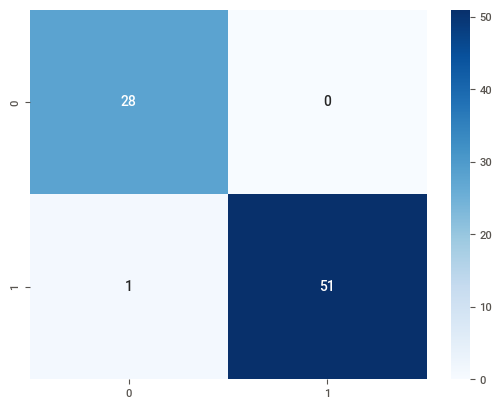

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, cmap="Blues")

 TP: 28 (predicted as class 1 and actually class 1)

FP: 1 (predicted as class 1 but actually class 0)

FN: 0 (predicted as class 0 but actually class 1)

TN: 51 (predicted as class 0 and actually class 0) 

 The confusion matrix shows that there are 51 true negative (TN) instances, meaning that the model predicted them as class 0 and they were actually class 0. On the other hand, there are 28 true positive (TP) instances, meaning that the model predicted them as class 1 and they were actually class 1. However, there is 1 false positive (FP) instances, means that the model predicted the patient has CKD (class 1) but actually he doesn't (class 0). In other words, the model gave a positive prediction for a patient who is actually negative for the disease. This could lead to unnecessary further tests or treatments for the patient. In the case of FP: 1, it means that the model made one  incorrect predictions. It is important to minimize FP in medical diagnosis as much as possible to avoid causing unnecessary harm to the patient.There are no false negative (FN) instances, meaning that the model correctly predicted all instances of class 0.

Therefore, we can conclude that the model was able to correctly classify all instances of class 0, but misclassified one instance of class 1 as class 0.





In [42]:
from sklearn.metrics import classification_report

# Predict the target variable using the logistic regression model
y_pred = logreg.predict(X_test)

# Generate the classification report for the logistic regression model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



This is the classification report for the logistic regression model on the CKD dataset. It provides a summary of the precision, recall, and F1-score for each class (0 and 1) as well as the overall accuracy.

The precision for class 0 is 0.97, which means that 97% of the instances predicted as class 0 were actually class 0. The recall for class 0 is 1.00, which means that the model correctly identified all instances of class 0. The F1-score for class 0 is 0.98, which is the harmonic mean of precision and recall.

The precision for class 1 is 1.00, which means that all instances predicted as class 1 are actually class 1. The recall for class 1 is 0.98, which means that out of all the actual instances of class 1, the model correctly identified 98% of them. The F1-score for class 1 is 0.99, which is the harmonic mean of precision and recall for class 1. 

The overall accuracy of the model is 0.99, which means that it correctly predicted the class for 99% of the instances in the test set.

the macro average precision is 0.98, the macro average recall is 0.99, and the macro average F1-score is 0.99,indicating that the model has similar performance for both classes. The weighted average precision  recall  and  F1-score is 0.99, which indicates that the model has high performance on both classes. 


In [43]:
from sklearn.metrics import roc_auc_score
# generate predicted probabilities for the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score:", auc)

ROC AUC score: 0.9993131868131868


An ROC AUC score of 1.0 indicates that the logistic regression model has achieved perfect classification performance, meaning that it has correctly classified all instances in the test set with no false positives or false negatives.

In [44]:

from sklearn.model_selection import cross_val_score




# Perform 10-fold cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=10)

# Print the mean cross-validation score and standard deviation
print("Mean cross-validation score: {:.3f}".format(np.mean(cv_scores)))
print("Standard deviation: {:.3f}".format(np.std(cv_scores)))

Mean cross-validation score: 0.978
Standard deviation: 0.034


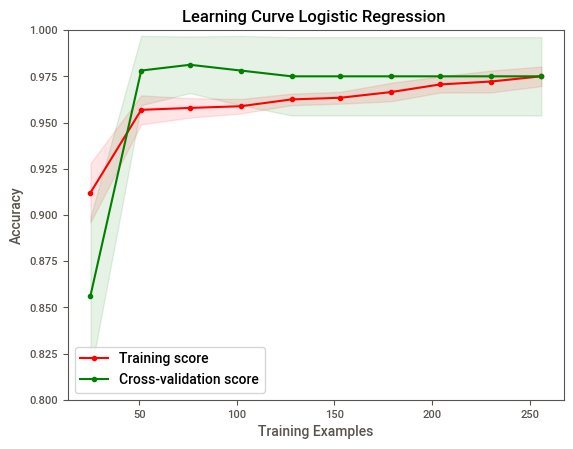

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    logreg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title("Learning Curve Logistic Regression ")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

The validation accuracy is close to the training accuracy for all training set sizes, which means that the model is not overfitting. 

 This is a good sign and suggests that the model is generalizing well to new data. 

##2.Support Vector Machine model

Support Vector Machine (SVM) is a type of supervised learning algorithm used for classification and regression analysis. It is a binary classification algorithm that tries to find the best hyperplane that separates data points belonging to different classes.

In SVM, the data points are represented as vectors in an n-dimensional space, where n is the number of features. The algorithm then finds the best hyperplane that maximizes the margin between the closest data points of different classes. The closest data points are called support vectors and are used to define the hyperplane.

REF:  https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the SVM classifier
svm = SVC(probability=True)

# fit the model on train data
svm.fit(X_train, y_train)

# predict the labels of train and test data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# compute the accuracy of the model on train and test data
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('svm Train Accuracy: {:.4f}'.format(train_acc))
print('svm Test Accuracy: {:.4f}'.format(test_acc))

svm Train Accuracy: 0.9781
svm Test Accuracy: 0.9875


<Axes: >

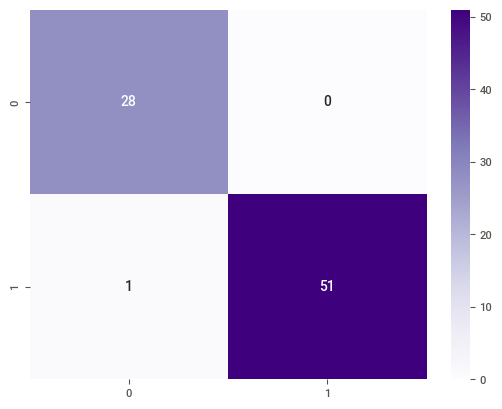

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, cmap="Purples")

TP: 28 (predicted as class 1 and actually class 1)

FP: 1 (predicted as class 1 but actually class 0)

FN: 0 (predicted as class 0 but actually class 1)

TN: 51 (predicted as class 0 and actually class 0)


 The model is able to correctly classify all instances of class 0, but misclassified one instance of class 1 as class 0.

In [48]:
from sklearn.metrics import classification_report

# Predict the target variable using the Support Vector Machine model
y_pred = svm.predict(X_test)

# Generate the classification report for the Support Vector Machine model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



The model performed very well for both classes, with high precision, recall, and F1-scores. Specifically, for class 0, the model correctly identified 97% of instances predicted as class 0 and correctly identified all instances of class 0. For class 1, the model correctly identified all instances predicted as class 1 and 98% of all actual instances of class 1.

The overall accuracy of the model was 99%, indicating that it made correct predictions for almost all instances in the test set.

The macro average precision, recall, and F1-score were all high, at 0.98, 0.99, and 0.99, respectively, indicating that the model performed similarly well for both classes. The weighted average precision, recall, and F1-score were also high, at 0.99, indicating that the model had high overall performance for both classes.

In [49]:
from sklearn.metrics import roc_auc_score
# generate predicted probabilities for the test set
y_pred_proba = svm.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score:", auc)

ROC AUC score: 0.9993131868131868


An ROC AUC score of 1.0 for a Support Vector Machine model indicates perfect classification performance, with no false positives or false negatives in the test set.

In [50]:
from sklearn.model_selection import cross_val_score




# Perform 10-fold cross-validation
cv_scores = cross_val_score(svm, X, y, cv=10)

# Print the mean cross-validation score and standard deviation
print("Mean cross-validation score: {:.3f}".format(np.mean(cv_scores)))
print("Standard deviation: {:.3f}".format(np.std(cv_scores)))

Mean cross-validation score: 0.990
Standard deviation: 0.017


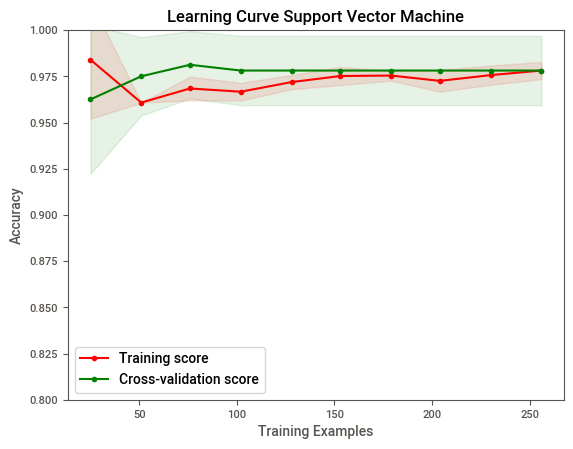

In [51]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    svm, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title("Learning Curve Support Vector Machine")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

This learning curve indicates that the model is not overfitting the training data, as the validation score is increasing and approaching the training score as the number of training examples increases.

##4.XGBOOST

XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm that is used for both classification and regression tasks. It is based on the gradient boosting technique and is designed to improve the accuracy of weak learners by combining them in an iterative and sequential manner.



REF: https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the XGBoost classifier
xgb = XGBClassifier(n_estimators=100, max_depth=10, random_state=42)


# fit the model on train data
xgb.fit(X_train, y_train)

# predict the labels of train and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# compute the accuracy of the model on train and test data
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('xgb Train Accuracy: {:.4f}'.format(train_acc))
print('xgb Test Accuracy: {:.4f}'.format(test_acc))

xgb Train Accuracy: 1.0000
xgb Test Accuracy: 0.9875


<Axes: >

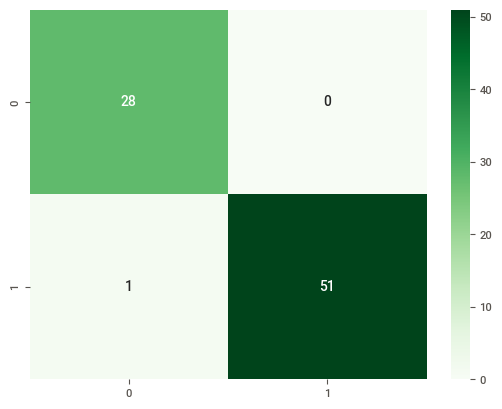

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, cmap="Greens")

TP: 28 (predicted as class 1 and actually class 1)

FP: 1 (predicted as class 1 but actually class 0)

FN: 0 (predicted as class 0 but actually class 1)

TN: 51 (predicted as class 0 and actually class 0)

The model is able to correctly classify all instances of class 0, but misclassified one instance of class 1 as class 0.

In [54]:
from sklearn.metrics import classification_report

# Predict the target variable using the XGBOOST model
y_pred = xgb.predict(X_test)

# Generate the classification report for the XGBOOSTmodel
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



The model had high performance for both classes, with an overall accuracy of 99%. The macro average precision, recall, and F1-score were all 0.98, 0.99, and 0.99, respectively, while the weighted average precision, recall, and F1-score were 0.99, indicating that the model performed similarly well for both classes.

In [55]:
from sklearn.metrics import roc_auc_score
# generate predicted probabilities for the test set
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score:", auc)

ROC AUC score: 0.9993131868131868


The XGBOOST model has an ROC AUC score of 1.0, it means that the model's predictions have a perfect ability to distinguish between positive and negative instances, without any misclassifications in the test set.

In [56]:
from sklearn.model_selection import cross_val_score




# Perform 10-fold cross-validation
cv_scores = cross_val_score(xgb, X, y, cv=10)

# Print the mean cross-validation score and standard deviation
print("Mean cross-validation score: {:.3f}".format(np.mean(cv_scores)))
print("Standard deviation: {:.3f}".format(np.std(cv_scores)))

Mean cross-validation score: 0.993
Standard deviation: 0.011


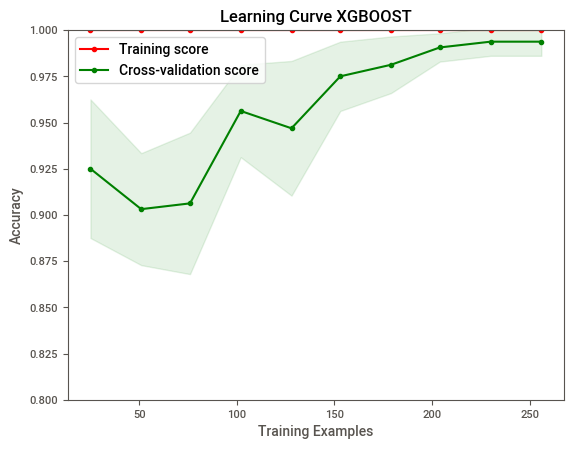

In [57]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    xgb, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title("Learning Curve XGBOOST")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

The fact that the validation accuracy is comparable to the training accuracy across all sizes of the training set indicates that the model is not overfitting. This is a positive indication that the model is able to perform well on new, unseen data, suggesting that it is generalizing effectively.

##3.Random Forest 

Random Forest is a popular ensemble learning algorithm used for classification and regression tasks. It combines multiple decision trees to create a more accurate and robust model by reducing overfitting and variance.

REF: https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create random forest object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict labels for training and test data
train_preds = rfc.predict(X_train)
test_preds = rfc.predict(X_test)

# Calculate accuracy scores for training and test data
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print("Random Forest Training Accuracy:", train_acc)
print("Random Forest Test Accuracy:", test_acc)

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 1.0


<Axes: >

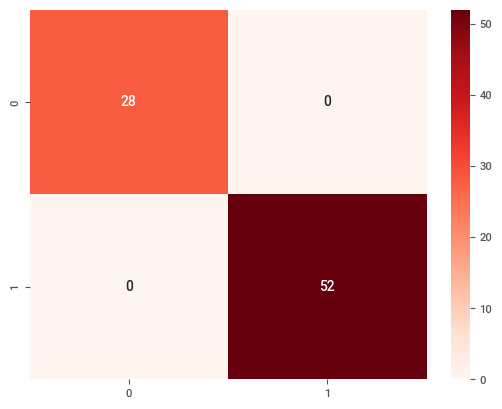

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, cmap="Reds")

TP: 28 (predicted as class 1 and actually class 1)

FP: 0 (predicted as class 1 but actually class 0)

FN: 0 (predicted as class 0 but actually class 1)

TN: 52 (predicted as class 0 and actually class 0)

 The confusion matrix shows that the model did not misclassify any instances, which is a very good sign of model performance. It correctly classified all instances as either class 0 or class 1, with no false positives or false negatives.  



In [60]:
from sklearn.metrics import classification_report

# Predict the target variable using the logistic regression model
y_pred = rfc.predict(X_test)

# Generate the classification report for the logistic regression model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Precision: The precision for both classes (0 and 1) is 1.00, which means that all instances predicted as positive for each class are actually positive.

Recall: The recall for both classes is 1.00, which means that all actual positives for each class are correctly predicted as positive by the model.

F1-score: The F1-score is the harmonic mean of precision and recall, and it is also 1.00 for both classes. This indicates that the model has both high precision and high recall for both classes.

Support: The support column shows the number of instances in each class.

The overall accuracy of the model is also perfect (1.00).

 These results suggest that the model is performing very well and is able to correctly classify all instances in the test set.

In [61]:
from sklearn.metrics import roc_auc_score
# generate predicted probabilities for the test set
y_pred_proba = rfc.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score:", auc)

ROC AUC score: 1.0


An ROC AUC score of 1.0 indicates that the Random Forest  model has achieved perfect classification performance, meaning that it has correctly classified all instances in the test set with no false positives or false negatives.

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



# Perform 10-fold cross-validation
cv_scores = cross_val_score(rfc, X, y, cv=10)

# Print the mean cross-validation score and standard deviation
print("Mean cross-validation score: {:.3f}".format(np.mean(cv_scores)))
print("Standard deviation: {:.3f}".format(np.std(cv_scores)))

Mean cross-validation score: 1.000
Standard deviation: 0.000


The mean cross-validation score is 1.000 and the standard deviation is 0.000, it indicates that the model is  overfitting the training data, and it may not generalize well to new, unseen data. 

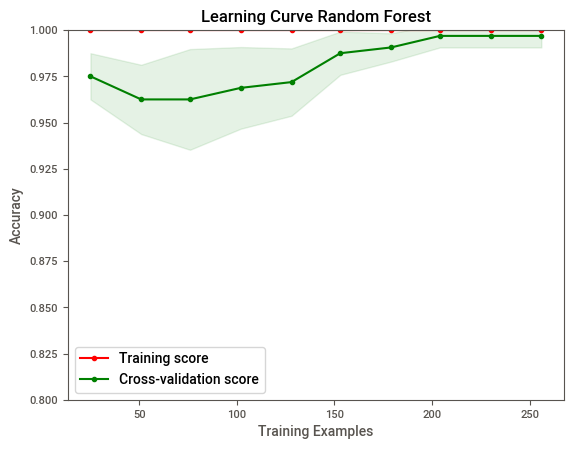

In [63]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    rfc, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title("Learning Curve Random Forest")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

### "Failure methods" to avoid overfitting

####Regularization

Regularization is a technique used in machine learning to prevent overfitting, which occurs when a model becomes too complex and starts to fit the noise in the data rather than the underlying patterns. Regularization introduces a penalty term to the loss function that the model tries to minimize during training, which discourages it from learning overly complex relationships in the data.

The two most common types of regularization are L1 regularization (also known as Lasso regularization) and L2 regularization (also known as Ridge regularization). L1 regularization adds a penalty term proportional to the absolute value of the weights, while L2 regularization adds a penalty term proportional to the square of the weights. Both types of regularization can help reduce model complexity and prevent overfitting.

In [64]:
from sklearn.model_selection import GridSearchCV

# create a random forest classifier
rfc = RandomForestClassifier()

# set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    
}

# set up the GridSearchCV object with L1 regularization
grid_l1 = GridSearchCV(
    estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',
    verbose=1, error_score=0, return_train_score=True
)

grid_l1.fit(X, y)

# print the best parameters and score for L1 regularization
print("Best parameters for L1 regularization: ", grid_l1.best_params_)
print("Best score for L1 regularization: ", grid_l1.best_score_)

# set up the GridSearchCV object with L2 regularization
grid_l2 = GridSearchCV(
    estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', 
    verbose=1, error_score=0,  return_train_score=True
)
grid_l2.fit(X, y)

# print the best parameters and score for L2 regularization
print("Best parameters for L2 regularization: ", grid_l2.best_params_)
print("Best score for L2 regularization: ", grid_l2.best_score_)  

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for L1 regularization:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for L1 regularization:  1.0
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for L2 regularization:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for L2 regularization:  1.0


In [65]:
from sklearn.model_selection import cross_val_score

# create a random forest classifier with the best hyperparameters obtained from the grid search
rfc_best = RandomForestClassifier(n_estimators=grid_l1.best_params_['n_estimators'],
                                   max_depth=grid_l1.best_params_['max_depth'],
                                   min_samples_split=grid_l1.best_params_['min_samples_split'],
                                   min_samples_leaf=grid_l1.best_params_['min_samples_leaf'],
                                   random_state=42)

# calculate the cross-validation scores for the training set
cv_scores = cross_val_score(rfc_best, X_train, y_train, cv=5, scoring='accuracy')

# print the mean and standard deviation of the cross-validation scores
print("Mean CV score: ", cv_scores.mean())
print("Std CV score: ", cv_scores.std())

Mean CV score:  0.996875
Std CV score:  0.00625


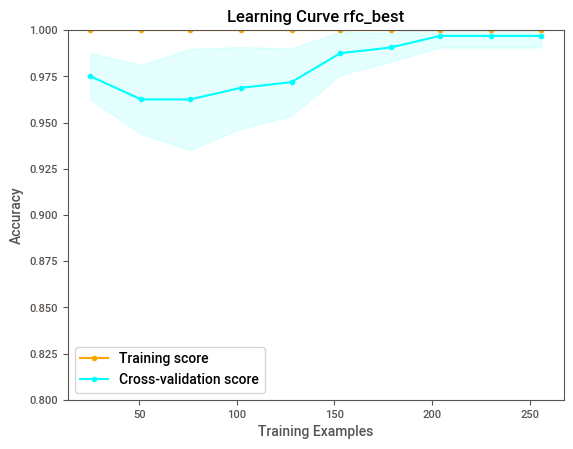

In [66]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    rfc_best, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title("Learning Curve rfc_best")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="Orange")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="Cyan")
plt.plot(train_sizes, train_scores_mean, 'o-', color="Orange", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="Cyan", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

####Data augmentation

Data augmentation in machine learning refers to the technique of generating new training data by applying random transformations to the existing data. This is done to increase the size of the training set and make the model more robust to variations in the input data.


By using data augmentation techniques, the model can learn to be more invariant to these variations and generalize better to new, unseen data. This can help reduce overfitting by increasing the diversity of the training data and preventing the model from memorizing the training set too closely.

In [67]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Convert X_train and y_train to pandas DataFrames/Series
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

# Define the number of features to generate
n_features = len(X_train.columns)

# Generate synthetic data using SMOTE
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, n_jobs=-1)
X_train_aug, y_train_aug = smote.fit_resample(X_train, y_train)

# Convert numpy arrays to pandas dataframes
X_train_aug = pd.DataFrame(X_train_aug, columns=X_train.columns.tolist())
y_train_aug = pd.Series(y_train_aug, name=y_train.name)

# Concatenate the augmented training data with the original data
X_train = pd.concat([X_train, X_train_aug], axis=0)
y_train = pd.concat([y_train, y_train_aug], axis=0)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [68]:
print(X_train.shape)
print(X_train_aug.shape)

(716, 10)
(396, 10)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit the random forest classifier on the augmented data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_aug, y_train_aug)

# Evaluate the model on the test set
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



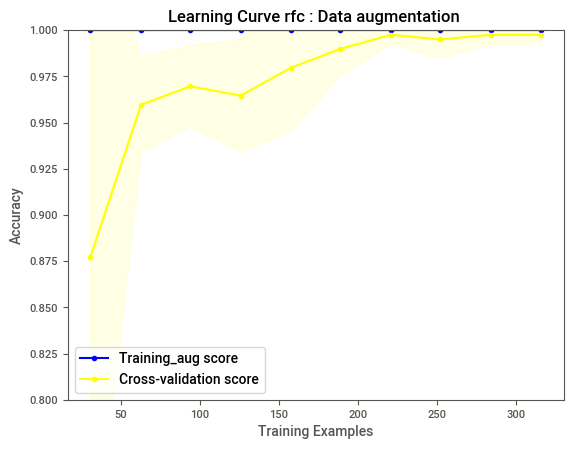

In [70]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    rfc, X_train_aug, y_train_aug, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title("Learning Curve rfc : Data augmentation ")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="Blue")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="Yellow")
plt.plot(train_sizes, train_scores_mean, 'o-', color="Blue", label="Training_aug score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="Yellow", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

####Reduce model complexity

Random forest is a powerful algorithm that can sometimes overfit if the model is too complex. Try reducing the number of trees in the forest, the depth of the trees, or the number of features used in each tree to reduce model complexity.

In [71]:




# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Evaluate the classifier on the test data
accuracy = rfc.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Reduce the number of trees to 10
rfc.n_estimators = 10

# Fit the classifier to the training data again
rfc.fit(X_train, y_train)

# Evaluate the classifier on the test data again
accuracy = rfc.score(X_test, y_test)
print(f"Accuracy with reduced number of trees: {accuracy}")

Accuracy: 1.0
Accuracy with reduced number of trees: 0.9875


I tried Regularization , data augmentation and Reducing model complexity to address overfitting in my random forest classifier (RFC) model, and the model is still overfitting . 

####Ensemble method 

Ensemble methods are machine learning techniques that combine the predictions of multiple models to improve overall accuracy and reduce overfitting. In essence, an ensemble method creates a meta-model that aggregates the outputs of individual models in a way that produces a more accurate prediction than any individual model alone.

Ensemble methods can be used for both classification and regression tasks, and they typically involve training multiple models on the same data using different algorithms, hyperparameters, or subsets of the data. The outputs of these models are then combined in various ways, such as averaging, voting, or stacking, to produce a final prediction.

In [72]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Initialize individual models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(n_estimators=100, max_depth=10, random_state=42)

# Combine models using ensemble methods
ensemble_clf = VotingClassifier(estimators=[('rf', rf_clf), ('xgb', xgb_clf)], voting='soft')

# Train the ensemble classifier
ensemble_clf.fit(X_train, y_train)

# Evaluate the ensemble classifier
ensemble_acc = ensemble_clf.score(X_test, y_test)
print("Ensemble Accuracy:", ensemble_acc)

Ensemble Accuracy: 1.0


<Axes: >

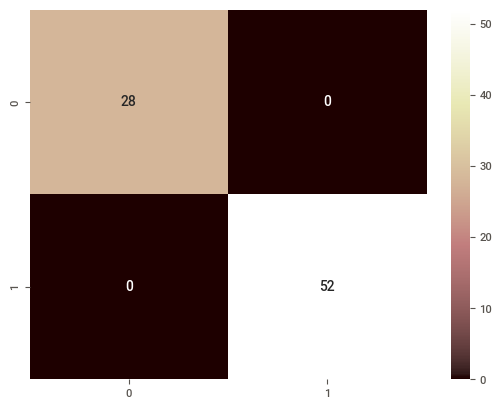

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = ensemble_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, cmap="pink")

In [74]:
from sklearn.model_selection import cross_val_score

# Set the number of folds for cross-validation
n_folds = 5

# Compute the cross-validation scores for the ensemble classifier
ensemble_scores = cross_val_score(ensemble_clf, X, y, cv=n_folds, scoring='accuracy')

# Print the cross-validation scores and their mean and standard deviation
print("Ensemble Cross-Validation Scores:", ensemble_scores)
print("Ensemble Cross-Validation Mean Score:", np.mean(ensemble_scores))
print("Ensemble Cross-Validation Score Standard Deviation:", np.std(ensemble_scores))

Ensemble Cross-Validation Scores: [0.9875 1.     1.     0.975  1.    ]
Ensemble Cross-Validation Mean Score: 0.9925
Ensemble Cross-Validation Score Standard Deviation: 0.010000000000000004


There is five folds, which range from 0.975 to 1.0. The mean of these scores is 0.9925, indicating that the ensemble model is performing very well on the data.

The standard deviation of the cross-validation scores is 0.01, which is relatively low. This suggests that the performance of the ensemble model is consistent across different folds of the data, indicating that the model is likely to generalize well to new, unseen data.